***
## [October 2018] - Gap table for horizontal polarization
### Abstract:

For operation mode, the situation looks like the following:
 - First harmonics cover about 10-200eV
 - Third harmonics cover about 200-260eV
 - Wiggler mode covers the rest

The first harmonics were already tracked in an earlier set by Balu. I don't know the details, but I have the results ('BaluFlux_Oct2018')

Here I'll look at the third harmonics plus wiggler mode. 

Ultimately we want to use this information to construct a lookup table and flux plot - but bear in mind that at least for now, our energy calibration is a moving target so such a table is only an approximation.

**Important:** In 'wiggler mode' the beam profile is total bullshit. You must open up the mono baffles fully in order to let everything through; it's not centered on-axis


***

In [2]:
from BLOCH_beamline import *

data_folder = Path('Data/')
#data_folder = Path('Y:/motorscan/unduscan2/')
#%matplotlib notebook
%matplotlib inline
font = {'size'   : 14}
matplotlib.rc('font', **font)

---- BLOCH beamline ----
	Last updated 02.13.2018 

	Latest change: Simple resolution calculators



## Measurement details

|Electrometer channel|Measurement|
|-|-|
| b110a_ctl_em02_ch03 |Current at the M4 photodiode|
| b110a_ctl_em03_ch01 | Exit slit left baffle |
| b110a_ctl_em03_ch02 | Exit slit right baffle |

|Beamline parameter | Setting |
|-|-|
| Ring current | 200mA|
| F.E. mm(1x,2x, 1y, 2y) | (-2.49, -5.58, -3.2, -5) |
| F.E. gap (x,y) | (-8.07, -8.2) |
| F.E. offset (x,y) | (1.55, 0.9) |
| M1 (pitch,lateral) | (-1760\*, 1800) |
| Mono baffle gap (h, v) |(15,15)|
| Mono baffle offset (h, v) | (-0.2,0.7)|
| M3 baffle gap (h, v) | (50mm,19mm)|
| Exit slit gap (h, v) | (130um, 1200um) |
| M4 baffle gap (h, v) | (50mm,19mm)|

\* Feedback loop on, so actually who knows

| Filename | Scan | EPU gap | hv range | Comments |
|-|-|-|-|-|
|undu_mono_scan2| 979 | 47 | 65-300| mono 2$\sigma$|
|undu_mono_scan2| 980 | 47.5 | ?| |
|undu_mono_scan2| 982 | 48.0 | ?| |
|undu_mono_scan2| 983 | 48.5 | ?| |
|undu_mono_scan2| 984 | 49.5 | ?| |
|undu_mono_scan2| 986 .. 990 | 50 .. 52 step 0.5 | ?| |
|undu_mono_scan2| 994 .. 999 | 53 .. 58 step 1| 260-960| |
|undu_mono_scan2| 1083 | 14 | ?|'Wiggler mode' |
|undu_mono_scan2| 1084 | 20 | ?|'Wiggler mode'|
|-|-|-|-|-|
|undu_mono_scan3| 1340 | 50 | 200-400 | mono 15x15 |
|undu_mono_scan4| 1345- 1358 | 50.5 - 57 step 0.5 | 200-400| |
|undu_mono_scan4| 1362 - 1369 | 57.5 - 60.5 step 0.5 | 200-400 | |
|undu_mono_scan4| 1370 | 19 | 200-1000 | 'Wiggler mode' for high energies|


***
## Third harmonic scans

The data was taken pretty piecemeal. Here I'll just load and examine everything I can find, up to a limit of 52mm. Beyond this the third harmonic lands on the carbon edge, and from that point and beyond you're better off in wiggler mode.

I'll attempt to automatically pull out the energy of maximum flux by predicting where the third harmonic should be, then searching for a maximum in the spectrum within some window around that. The prediction is based on Balu's earlier map of the first harmonic + knowledge of what multiple the third sits at.

In [3]:
def maxInSubset(xwave,ywave,xstart,xstop):
    maximum=0
    maximum_index=0
    for index,x in enumerate(xwave):
        if x>=xstart and maximum<ywave[index] and x<=xstop:
            maximum=ywave[index]
            maximum_index=index
            
    return maximum,xwave[maximum_index]
            

In [4]:
scanSet = []

dataFile=data_folder/"undu_mono_scan2.h5"
entries = [979,980,982,983,984]
gaps = [47,47.5,48,48.5,49.5]
[entries.append(n) for n in [986,987,988,989,990]]
[gaps.append(n) for n in [50,50.5,51,51.5,52]]


for entryNumber in entries:
    scanSet.append(HDF5loadscan(dataFile,entryNumber))
    scanSet[-1]['mono_energy_calibrated']=calibrateMonoEnergy(scanSet[-1]['mono_energy'])
    scanSet[-1]['diodeCurrent'] = [((ii*-1)/1000) for ii in scanSet[-1]['b110a_ctl_em02_ch03']]
    scanSet[-1]['flux'] = [currentToFlux(I,hv) for I,hv in zip(scanSet[-1]['diodeCurrent'],scanSet[-1]['mono_energy_calibrated'])]


dataFile=data_folder/"undu_mono_scan3.h5"
entriesToLoad=[]
[entries.append(n) for n in [1340]]
[entriesToLoad.append(n) for n in [1340]]
[gaps.append(n) for n in [50]]
for entryNumber in entriesToLoad:
    scanSet.append(HDF5loadscan(dataFile,entryNumber))
    scanSet[-1]['mono_energy_calibrated']=calibrateMonoEnergy(scanSet[-1]['mono_energy'])
    scanSet[-1]['diodeCurrent'] = [((ii*-1)/1000) for ii in scanSet[-1]['b110a_ctl_em02_ch03']]
    scanSet[-1]['flux'] = [currentToFlux(I,hv) for I,hv in zip(scanSet[-1]['diodeCurrent'],scanSet[-1]['mono_energy_calibrated'])]



dataFile=data_folder/"undu_mono_scan4.h5"
entriesToLoad=[]
[entriesToLoad.append(n) for n in [1345,1346]]
[entries.append(n) for n in [1345,1346]]
[gaps.append(n) for n in [50.5,51]]
for entryNumber in entriesToLoad:
    scanSet.append(HDF5loadscan(dataFile,entryNumber))
    scanSet[-1]['mono_energy_calibrated']=calibrateMonoEnergy(scanSet[-1]['mono_energy'])
    scanSet[-1]['diodeCurrent'] = [((ii*-1)/1000) for ii in scanSet[-1]['b110a_ctl_em02_ch03']]
    scanSet[-1]['flux'] = [currentToFlux(I,hv) for I,hv in zip(scanSet[-1]['diodeCurrent'],scanSet[-1]['mono_energy_calibrated'])]


for index,scan in enumerate(scanSet):
    try:
        print("entry{0} had gap {1:2.1f}".format(entries[index],scan['EPU_R1_110_GAPposition'][-1]))
    except:
        print("entry{0} has unknown gap".format(entries[index]))


Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
entry979 has unknown gap
entry980 has unknown gap
entry982 has unknown gap
entry983 has unknown gap
entry984 has unknown gap
entry986 had gap 50.0
entry987 had gap 50.5
entry988 had gap 51.0
entry989 had gap 51.5
entry990 had gap 52.0
entry1340 h

--------------------
Entry number 979
Gap= 47
Third harmonic should be at 201.05eV
I think the actual maximum is at 204.69ev, with flux 1.95e+12


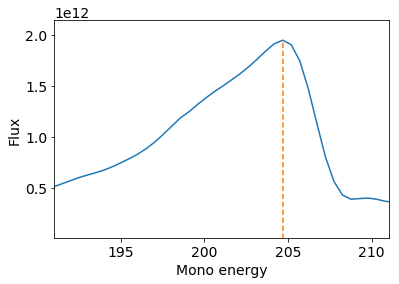

--------------------
Entry number 980
Gap= 47.5
Third harmonic should be at 206.75eV
I think the actual maximum is at 210.52ev, with flux 1.77e+12


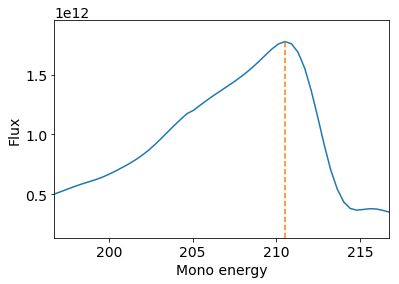

--------------------
Entry number 982
Gap= 48
Third harmonic should be at 212.44eV
I think the actual maximum is at 216.40ev, with flux 1.58e+12


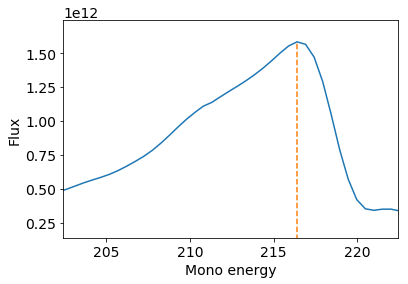

--------------------
Entry number 983
Gap= 48.5
Third harmonic should be at 218.50eV
I think the actual maximum is at 222.52ev, with flux 1.42e+12


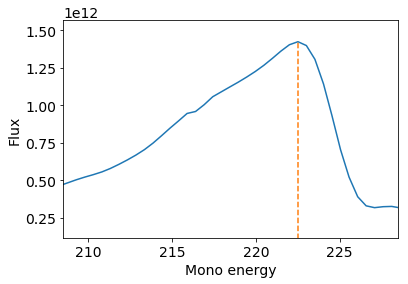

--------------------
Entry number 984
Gap= 49.5
Third harmonic should be at 230.63eV
I think the actual maximum is at 234.74ev, with flux 1.08e+12


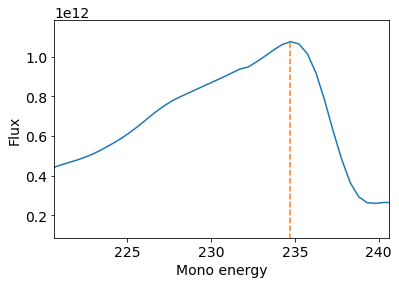

--------------------
Entry number 986
Gap= 50
Third harmonic should be at 236.69eV
I think the actual maximum is at 240.85ev, with flux 9.50e+11


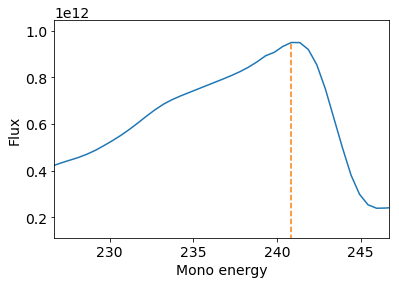

--------------------
Entry number 987
Gap= 50.5
Third harmonic should be at 243.04eV
I think the actual maximum is at 247.47ev, with flux 8.20e+11


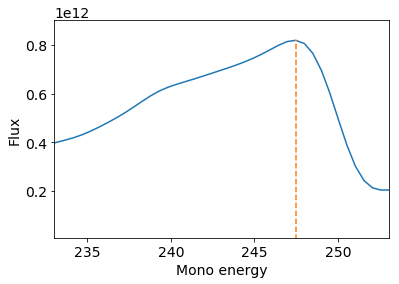

--------------------
Entry number 988
Gap= 51
Third harmonic should be at 249.40eV
I think the actual maximum is at 253.58ev, with flux 6.63e+11


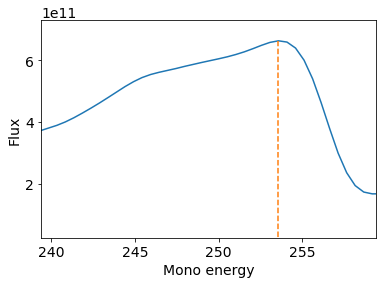

--------------------
Entry number 989
Gap= 51.5
Third harmonic should be at 255.75eV
I think the actual maximum is at 259.88ev, with flux 4.97e+11


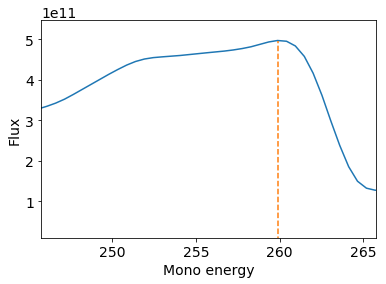

--------------------
Entry number 990
Gap= 52
Third harmonic should be at 262.10eV
I think the actual maximum is at 265.80ev, with flux 3.66e+11


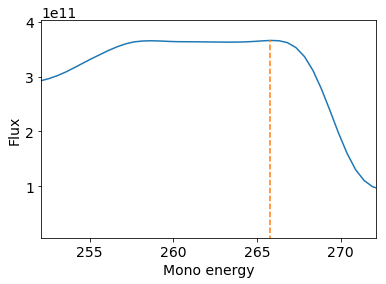

--------------------
Entry number 1340
Gap= 50
Third harmonic should be at 236.69eV
I think the actual maximum is at 241.15ev, with flux 1.10e+12


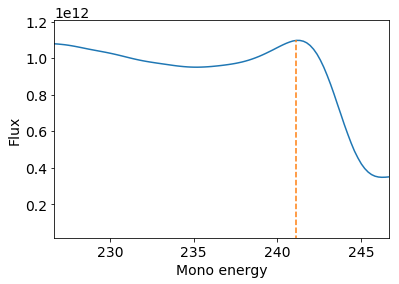

--------------------
Entry number 1345
Gap= 50.5
Third harmonic should be at 243.04eV
I think the actual maximum is at 247.47ev, with flux 9.50e+11


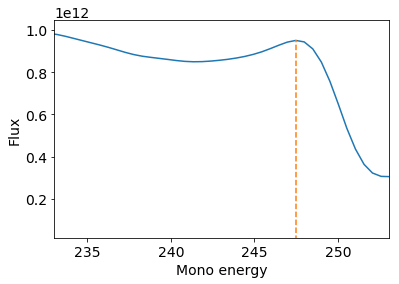

--------------------
Entry number 1346
Gap= 51
Third harmonic should be at 249.40eV
I think the actual maximum is at 253.57ev, with flux 7.59e+11


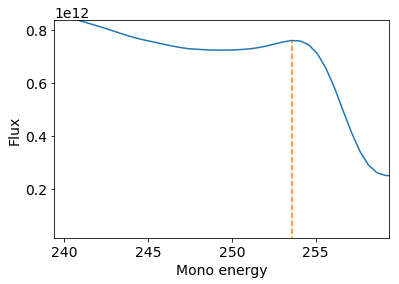

In [5]:
thirdHarmonicTable = {}
thirdHarmonicTable['gap'] = []
thirdHarmonicTable['hv'] = []
thirdHarmonicTable['flux'] = []

lookupTable = 'LookupTables/BaluFlux_Oct2018.txt'
for index,entry in enumerate(entries):
    print("--------------------")
    scan=scanSet[index]
    print("Entry number",entry)
    print("Gap=",gaps[index])
    thirdHarmonicEnergy=lookupHarmonicEnergy(lookupTable,gaps[index],3)
    print("Third harmonic should be at {0:.2f}eV".format(thirdHarmonicEnergy))
    experiment_flux ,experiment_hv= maxInSubset(scan['mono_energy_calibrated'],scan['flux'],thirdHarmonicEnergy-2,thirdHarmonicEnergy+5)
    print("I think the actual maximum is at {0:.2f}ev, with flux {1:.2e}".format(experiment_hv,experiment_flux))
    
    thirdHarmonicTable['gap'].append(gaps[index])
    thirdHarmonicTable['hv'].append(experiment_hv)
    thirdHarmonicTable['flux'].append(experiment_flux)
    
    fig=plt.figure()
    plt.plot(scan['mono_energy_calibrated'],scan['flux'])
    plt.plot([experiment_hv,experiment_hv],[0,experiment_flux],linestyle='--')
    plt.xlim([thirdHarmonicEnergy-10,thirdHarmonicEnergy+10])
    plt.ylim([np.min(scan['flux']),experiment_flux*1.1])
    plt.ylabel('Flux')
    plt.xlabel('Mono energy')
    plt.show()




***

## Local functions

***

In [6]:
#*****************************************************
def getPreviousData(fileName):
#*****************************************************    
    try:
        fp=open(fileName,'r')
    except:
        print("Couldn't find the lookup table")
        return 0,0,0

    next(fp)
    gap=[]
    firstHarmonic=[]
    flux=[]
    for line in fp:
        data=(line.rstrip('\n').split('\t'))
        gap.append(float(data[0]))
        firstHarmonic.append(float(data[1]))
        flux.append(float(data[2]))
    fp.close()  
    
    return np.array(gap),np.array(firstHarmonic),np.array(flux)

tb_gap,tb_firstHarmonic,tb_flux = getPreviousData('LookupTables/BaluFlux_Oct2018.txt')
cp_gap,cp_firstHarmonic,cp_flux = getPreviousData('LookupTables/HPOLfundamental.txt')

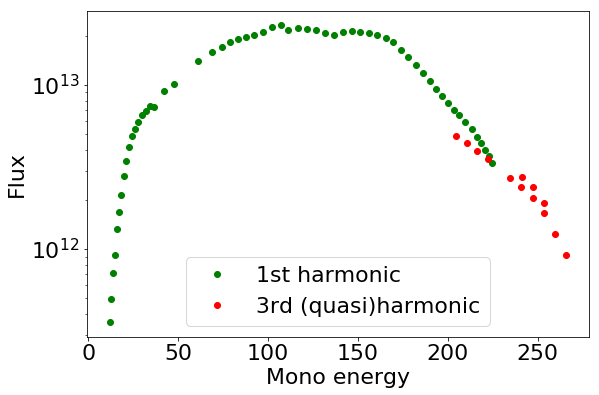

'\nplt.subplot(1,2,2)\nplt.plot(tb_firstHarmonic,tb_gap,\'bo\',label="First harmonic")\nplt.plot(thirdHarmonicTable[\'hv\'],thirdHarmonicTable[\'gap\'],\'ro\',label="Third harmonic")\nplt.plot(cp_firstHarmonic,cp_gap,\'go\',label=\'First harmonic (CP)\')\nplt.ylabel(\'EPU gap (mm)\')\nplt.xlabel(\'Photon energy (eV)\')\nplt.legend()\nplt.title("")\nplt.show()'

In [24]:
font = {'size'   : 22}
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(9,6))
plt.subplot(111)
thirdHarmonicTable['500mA_Flux']=[ii*(500/200) for ii in thirdHarmonicTable['flux']]
#plt.plot(tb_firstHarmonic,tb_flux*(500/200),'bo',label='First harmonic (TB)')
plt.plot(cp_firstHarmonic,cp_flux*(500/200),'go',label='1st harmonic')
plt.plot(thirdHarmonicTable['hv'],thirdHarmonicTable['500mA_Flux'],'ro',label='3rd (quasi)harmonic')

plt.ylabel('Flux')
plt.legend(loc='lower center')
plt.yscale('log')
#plt.xlim([10,280])
#plt.ylim([1e10,3e14])
plt.xlabel('Mono energy')
plt.show()
"""
plt.subplot(1,2,2)
plt.plot(tb_firstHarmonic,tb_gap,'bo',label="First harmonic")
plt.plot(thirdHarmonicTable['hv'],thirdHarmonicTable['gap'],'ro',label="Third harmonic")
plt.plot(cp_firstHarmonic,cp_gap,'go',label='First harmonic (CP)')
plt.ylabel('EPU gap (mm)')
plt.xlabel('Photon energy (eV)')
plt.legend()
plt.title("")
plt.show()"""


***
## 'Wiggler mode'


In [26]:
dataFile=data_folder/"undu_mono_scan4.h5"
wigglerMode19mm = HDF5loadscan(dataFile,1370)
wigglerMode19mm['mono_energy_calibrated']=calibrateMonoEnergy(wigglerMode19mm['mono_energy'])
wigglerMode19mm['diodeCurrent'] = [((ii*-1)/1000) for ii in wigglerMode19mm['b110a_ctl_em02_ch03']]
wigglerMode19mm['flux'] = [currentToFlux(I,hv) for I,hv in zip(wigglerMode19mm['diodeCurrent'],wigglerMode19mm['mono_energy_calibrated'])]


Implementing mono calibration according to Mats, May 2018


In [15]:
dataFile=data_folder/"undu_mono_scan2.h5"
wigglerMode14mm = HDF5loadscan(dataFile,1083)
wigglerMode14mm['mono_energy_calibrated']=calibrateMonoEnergy(wigglerMode14mm['mono_energy'])
wigglerMode14mm['diodeCurrent'] = [((ii*-1)/1000) for ii in wigglerMode14mm['b110a_ctl_em02_ch03']]
wigglerMode14mm['flux'] = [currentToFlux(I,hv) for I,hv in zip(wigglerMode14mm['diodeCurrent'],wigglerMode14mm['mono_energy_calibrated'])]

Implementing mono calibration according to Mats, May 2018


In [16]:
dataFile=data_folder/"undu_mono_scan2.h5"
wigglerMode20mm = HDF5loadscan(dataFile,1084)
wigglerMode20mm['mono_energy_calibrated']=calibrateMonoEnergy(wigglerMode20mm['mono_energy'])
wigglerMode20mm['diodeCurrent'] = [((ii*-1)/1000) for ii in wigglerMode20mm['b110a_ctl_em02_ch03']]
wigglerMode20mm['flux'] = [currentToFlux(I,hv) for I,hv in zip(wigglerMode20mm['diodeCurrent'],wigglerMode20mm['mono_energy_calibrated'])]


Implementing mono calibration according to Mats, May 2018


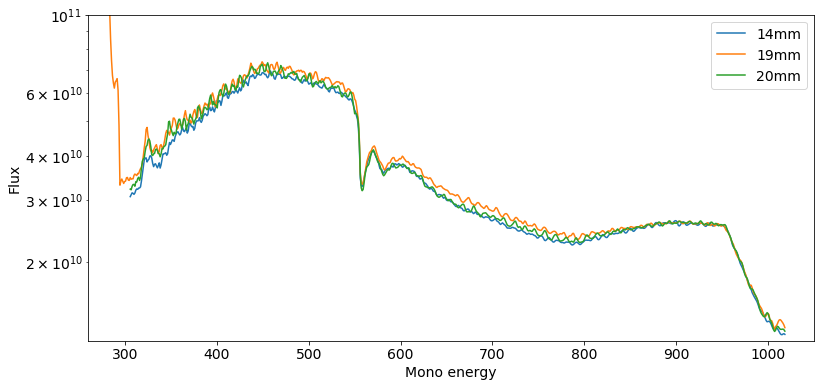

In [17]:
fig=plt.figure(figsize=(13,6))
plt.plot(wigglerMode14mm['mono_energy_calibrated'],wigglerMode14mm['flux'],label='14mm')
plt.plot(wigglerMode19mm['mono_energy_calibrated'],wigglerMode19mm['flux'],label='19mm')
plt.plot(wigglerMode20mm['mono_energy_calibrated'],wigglerMode20mm['flux'],label='20mm')
plt.ylabel('Flux')
plt.legend()
plt.yscale('log')
plt.xlim([260,1050])
plt.ylim([1.2e10,1e11])
plt.xlabel('Mono energy')
plt.show()


Be careful here - not completely sure that the settings were the same. Might not actually be the case that 19mm is higher flux than both 14mm and 20mm.

In any case: the difference is not really that much, but you do see the structure smoothing out at smaller gaps.

19mm a better choice for now pga heat loading

***
## Conclusion:

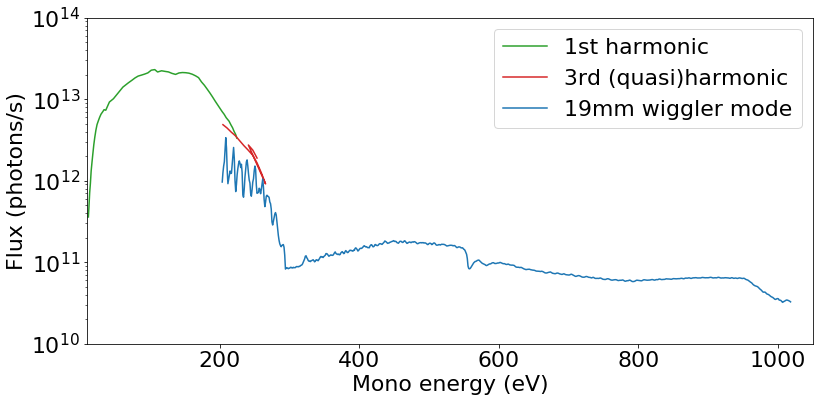

In [34]:
font = {'size'   : 22}
matplotlib.rc('font', **font)
fig=plt.figure(figsize=(13,6))
wigglerMode19mm['500mA_flux']=[ii*(500/200) for ii in wigglerMode19mm['flux']]
plt.plot(cp_firstHarmonic,cp_flux*(500/200),color='tab:green',label='1st harmonic')
plt.plot(thirdHarmonicTable['hv'],thirdHarmonicTable['500mA_Flux'],color='tab:red',label='3rd (quasi)harmonic')
plt.plot(wigglerMode19mm['mono_energy_calibrated'],wigglerMode19mm['500mA_flux'],color='tab:blue',label='19mm wiggler mode')

plt.ylabel('Flux (photons/s)')
plt.legend()
plt.yscale('log')
plt.xlim([10,1050])
plt.ylim([1e10,1e14])
plt.xlabel('Mono energy (eV)')
plt.show()


In [19]:
#*****************************************************
def getPreviousData(fileName):
#*****************************************************    
    try:
        fp=open(fileName,'r')
    except:
        print("Couldn't find the lookup table")
        return 0,0,0

    next(fp)
    firstHarmonic=[]
    flux=[]
    for line in fp:
        data=(line.rstrip('\n').split('\t'))
        firstHarmonic.append(float(data[1]))
        flux.append(float(data[0]))
    fp.close()  
    
    return np.array(firstHarmonic),np.array(flux)

rami_firstHarmonic,rami_flux = getPreviousData('LookupTables/Rami_DDR_redCurve.txt')


In [44]:
#*****************************************************
def getPreviousData(fileName):
#*****************************************************    
    try:
        fp=open(fileName,'r')
    except:
        print("Couldn't find the lookup table")
        return 0,0,0

    next(fp)
    hv=[]
    efficiency=[]
    for line in fp:
        data=(line.rstrip('\n').split('\t'))
        hv.append(float(data[0]))
        efficiency.append(float(data[1]))
    fp.close()  
    
    return np.array(hv),np.array(efficiency)

grating_hv,grating_efficiency = getPreviousData('LookupTables/800Lmm_efficiency.txt')


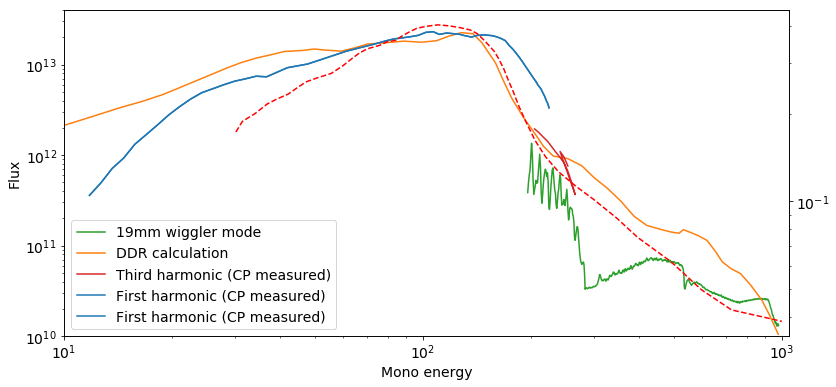

In [55]:
fig=plt.figure(figsize=(13,6))

ax1 = plt.subplot(111)
ax1.plot(wigglerMode19mm['mono_energy']*0.98,wigglerMode19mm['flux'],color='tab:green',label='19mm wiggler mode')
#plt.plot(tb_firstHarmonic,tb_flux*2.5,color='tab:blue',label='First harmonic')
ax1.plot(rami_firstHarmonic,rami_flux,color='tab:orange',label='DDR calculation')
ax1.plot(thirdHarmonicTable['hv'],thirdHarmonicTable['flux'],color='tab:red',label='Third harmonic (CP measured)')
ax1.plot(cp_firstHarmonic,cp_flux*(500/200),color='tab:blue',label='First harmonic (CP measured)')
ax1.plot(cp_firstHarmonic,cp_flux*(500/200),color='tab:blue',label='First harmonic (CP measured)')



plt.ylabel('Flux')
plt.legend()
plt.yscale('log')
plt.xscale('log')
plt.xlim([10,1050])
plt.ylim([1e10,4e13])
plt.xlabel('Mono energy')

ax2 = ax1.twinx()
ax2.plot(grating_hv,grating_efficiency,'r--')
plt.yscale('log')
plt.show()


In [18]:
def optimalGap(hv):
    if hv<=207:
        print(lookupHarmonicEnergy(gap,orderNumber):

SyntaxError: invalid syntax (<ipython-input-18-8778feca45fb>, line 3)

In [19]:
    
#*******************************************    
def lookupFirstOrderGap(hv):
#*******************************************
    tb_firstHarmonic,tb_flux
    
    for index,element in enumerate(tb_firstHarmonic):
        if index==0 and element[0]==gap:
            closestUnder=harmonic[index]
            closestOver=harmonic[index+1]
            terminatedOK = True
            break
        if index==0 and element[0]>gap:
            terminatedOK = False
            break            
        if index>0 and element[0]>=gap:
            closestUnder=harmonic[index-1]
            closestOver=harmonic[index]
            terminatedOK = True
            break

    if terminatedOK == True:

        gap0 = closestUnder[0]
        hv0 = closestUnder[1]
        gap1 = closestOver[0]
        hv1 = closestOver[1]   
        hv0_weight = abs((gap1-gap))/(gap1-gap0)
        hv1_weight = abs((gap0-gap))/(gap1-gap0)
        output = hv0*hv0_weight + hv1*hv1_weight

    if terminatedOK == False:
        print("ERROR: requested gap",gap,"is not within the lookup table (20 .. 78mm)")
        return float('NaN')
    
    if orderNumber == 1: return output
    elif orderNumber == 2: return 1.956*output
    elif orderNumber == 3: return 2.75*output   
    else:
        print("I don't know the multiplier for harmonics of order",harmonicOrder)
        return float('NaN')  

IndentationError: expected an indented block (<ipython-input-19-3d1214d2660f>, line 5)

In [20]:
calculateMonoAcceptance(6,6.5)

Mono horizontal gap size of 6 is 3 after accounting for offset.
This means an acceptance of 1.429 sigma
Mono vertical gap size of 6.5 is 3.0 after accounting for offset.
This means an acceptance of 1.429 sigma


***
## UPDATE: I took some more first harmonic sets

In [23]:
scanSet = []
dataFile=data_folder/"cp20c.h5"

entries = [n for n in range(2414,2445+1)]
gaps = [n for n in range(47,78+1)]


for entryNumber in entries:
    scanSet.append(HDF5loadscan(dataFile,entryNumber))
    scanSet[-1]['mono_energy_calibrated']=calibrateMonoEnergy(scanSet[-1]['mono_energy'])
    scanSet[-1]['diodeCurrent'] = [((ii*-1)/10000) for ii in scanSet[-1]['b110a_ctl_em02_ch03']]
    # 1.5uA on the alba is showing up as 0. 
    scanSet[-1]['flux'] = [currentToFlux(I,hv) for I,hv in zip(scanSet[-1]['diodeCurrent'],scanSet[-1]['mono_energy_calibrated'])]

try: print("entry{0} had gap {1:2.1f}".format(entries[0],scanSet[0]['EPU_R1_110_GAPposition'][-1]))
except: print("entry{0} has unknown gap".format(entries[0]))
try: print("entry{0} had gap {1:2.1f}".format(entries[-1],scanSet[-1]['EPU_R1_110_GAPposition'][-1]))
except: print("entry{0} has unknown gap".format(entries[-1]))

Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing m

--------------------
Entry number 2414
Gap= 47
First harmonic should be at 73.11eV
I think the actual maximum is at 74.32ev, with flux 6.83e+12


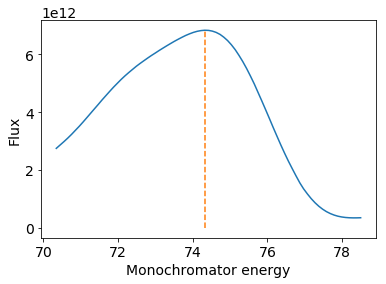

--------------------
Entry number 2415
Gap= 48
First harmonic should be at 77.25eV
I think the actual maximum is at 78.59ev, with flux 7.28e+12


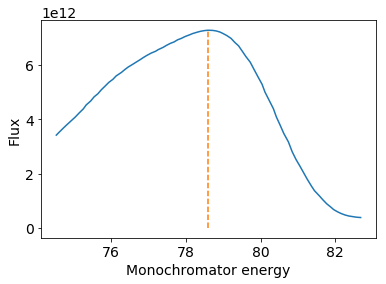

--------------------
Entry number 2416
Gap= 49
First harmonic should be at 81.66eV
I think the actual maximum is at 83.08ev, with flux 7.68e+12


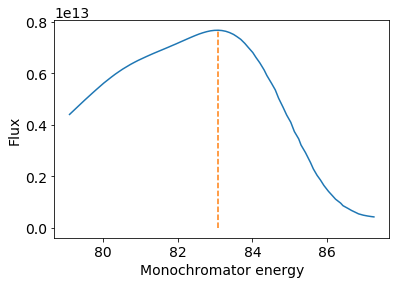

--------------------
Entry number 2417
Gap= 50
First harmonic should be at 86.07eV
I think the actual maximum is at 87.56ev, with flux 7.88e+12


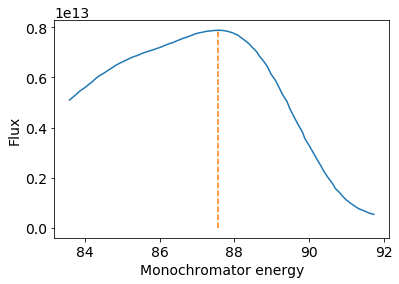

--------------------
Entry number 2418
Gap= 51
First harmonic should be at 90.69eV
I think the actual maximum is at 92.25ev, with flux 8.11e+12


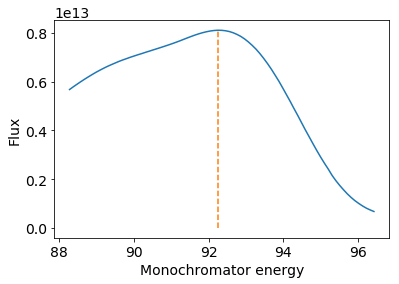

--------------------
Entry number 2419
Gap= 52
First harmonic should be at 95.31eV
I think the actual maximum is at 97.04ev, with flux 8.40e+12


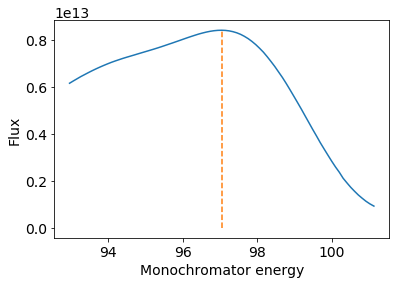

--------------------
Entry number 2420
Gap= 53
First harmonic should be at 100.12eV
I think the actual maximum is at 101.93ev, with flux 9.07e+12


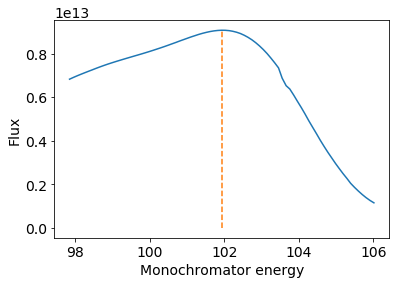

--------------------
Entry number 2421
Gap= 54
First harmonic should be at 104.94eV
I think the actual maximum is at 106.92ev, with flux 9.22e+12


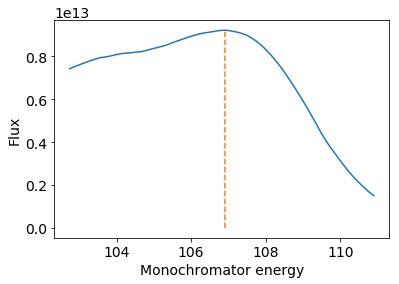

--------------------
Entry number 2422
Gap= 55
First harmonic should be at 109.83eV
I think the actual maximum is at 111.02ev, with flux 8.62e+12


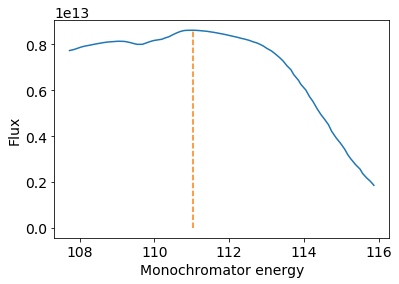

--------------------
Entry number 2423
Gap= 56
First harmonic should be at 114.72eV
I think the actual maximum is at 116.69ev, with flux 8.92e+12


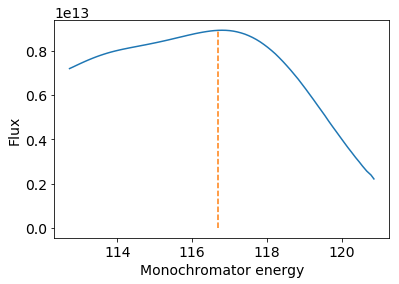

--------------------
Entry number 2424
Gap= 57
First harmonic should be at 119.66eV
I think the actual maximum is at 121.59ev, with flux 8.77e+12


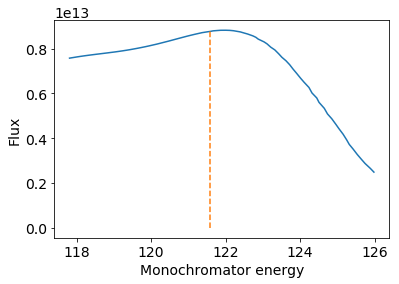

--------------------
Entry number 2425
Gap= 58
First harmonic should be at 124.60eV
I think the actual maximum is at 126.57ev, with flux 8.64e+12


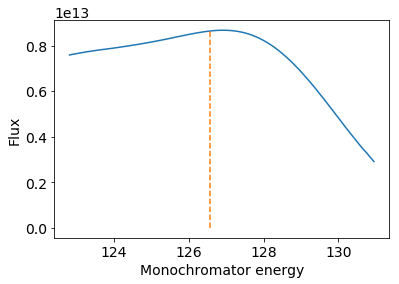

--------------------
Entry number 2426
Gap= 59
First harmonic should be at 129.68eV
I think the actual maximum is at 131.66ev, with flux 8.29e+12


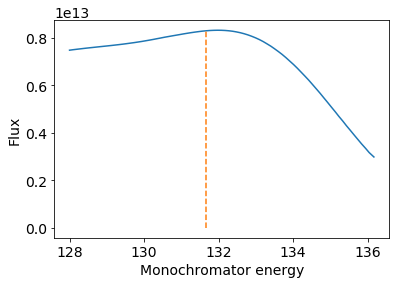

--------------------
Entry number 2427
Gap= 60
First harmonic should be at 134.76eV
I think the actual maximum is at 136.76ev, with flux 8.05e+12


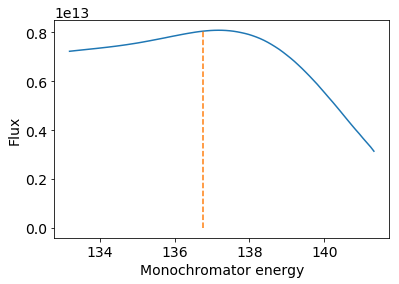

--------------------
Entry number 2428
Gap= 61
First harmonic should be at 139.69eV
I think the actual maximum is at 141.65ev, with flux 8.39e+12


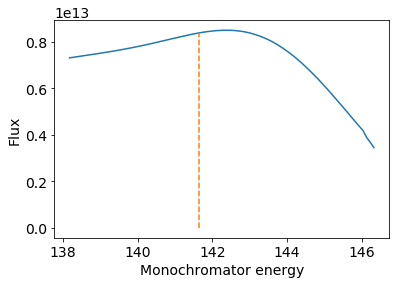

--------------------
Entry number 2429
Gap= 62
First harmonic should be at 144.63eV
I think the actual maximum is at 146.53ev, with flux 8.49e+12


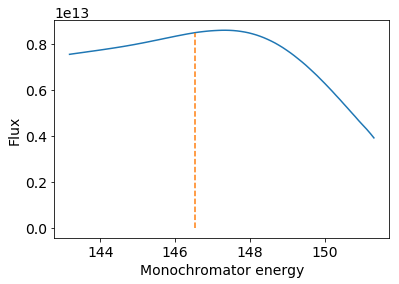

--------------------
Entry number 2430
Gap= 63
First harmonic should be at 149.37eV
I think the actual maximum is at 151.32ev, with flux 8.45e+12


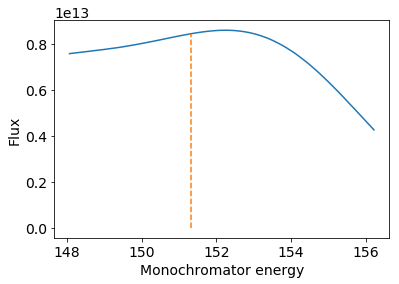

--------------------
Entry number 2431
Gap= 64
First harmonic should be at 154.10eV
I think the actual maximum is at 156.01ev, with flux 8.34e+12


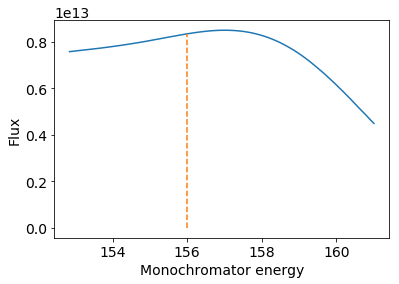

--------------------
Entry number 2432
Gap= 65
First harmonic should be at 158.85eV
I think the actual maximum is at 160.80ev, with flux 8.09e+12


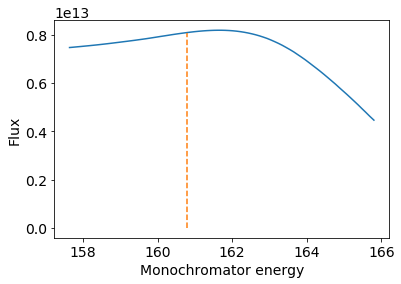

--------------------
Entry number 2433
Gap= 66
First harmonic should be at 163.60eV
I think the actual maximum is at 165.58ev, with flux 7.72e+12


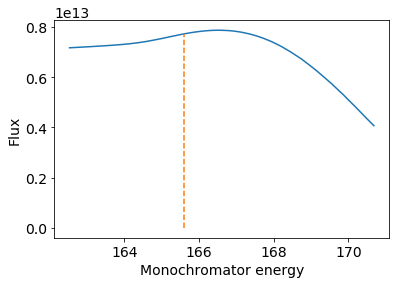

--------------------
Entry number 2434
Gap= 67
First harmonic should be at 167.80eV
I think the actual maximum is at 169.76ev, with flux 7.35e+12


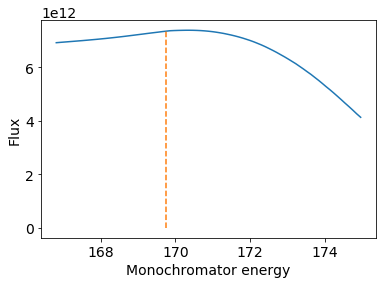

--------------------
Entry number 2435
Gap= 68
First harmonic should be at 172.00eV
I think the actual maximum is at 173.94ev, with flux 6.51e+12


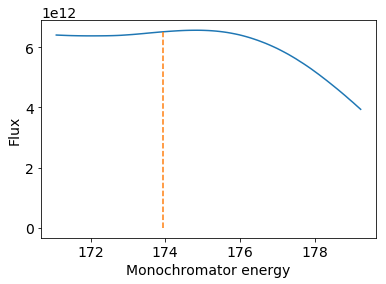

--------------------
Entry number 2436
Gap= 69
First harmonic should be at 176.13eV
I think the actual maximum is at 178.11ev, with flux 5.92e+12


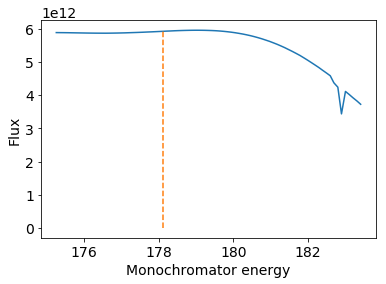

--------------------
Entry number 2437
Gap= 70
First harmonic should be at 180.27eV
I think the actual maximum is at 182.19ev, with flux 5.30e+12


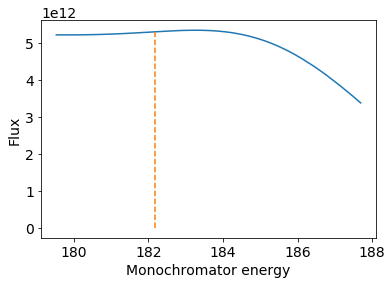

--------------------
Entry number 2438
Gap= 71
First harmonic should be at 184.07eV
I think the actual maximum is at 186.06ev, with flux 4.76e+12


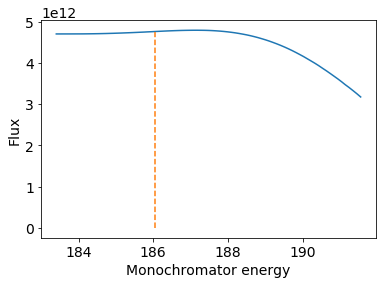

--------------------
Entry number 2439
Gap= 72
First harmonic should be at 187.87eV
I think the actual maximum is at 189.82ev, with flux 4.26e+12


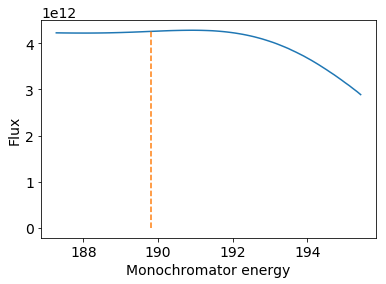

--------------------
Entry number 2440
Gap= 73
First harmonic should be at 191.45eV
I think the actual maximum is at 193.39ev, with flux 3.81e+12


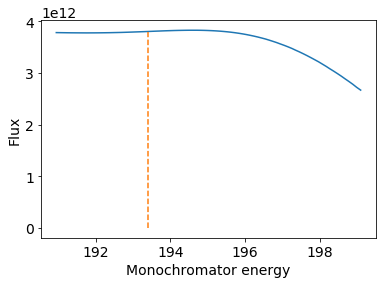

--------------------
Entry number 2441
Gap= 74
First harmonic should be at 195.04eV
I think the actual maximum is at 196.95ev, with flux 3.42e+12


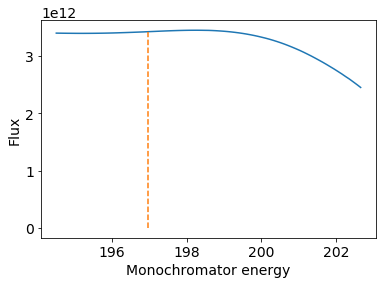

--------------------
Entry number 2442
Gap= 75
First harmonic should be at 198.32eV
I think the actual maximum is at 200.31ev, with flux 3.10e+12


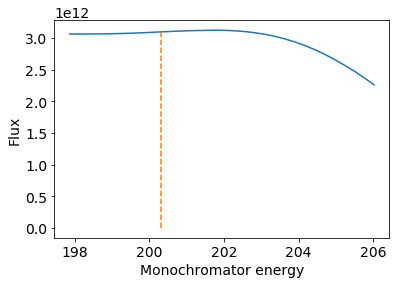

--------------------
Entry number 2443
Gap= 76
First harmonic should be at 201.60eV
I think the actual maximum is at 203.58ev, with flux 2.81e+12


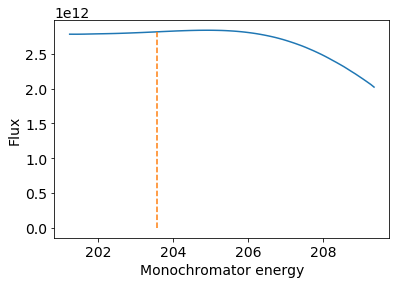

--------------------
Entry number 2444
Gap= 77
First harmonic should be at 204.51eV
I think the actual maximum is at 206.43ev, with flux 2.61e+12


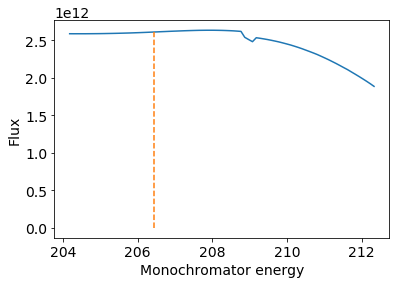

--------------------
Entry number 2445
Gap= 78
First harmonic should be at 207.43eV
I think the actual maximum is at 209.38ev, with flux 2.37e+12


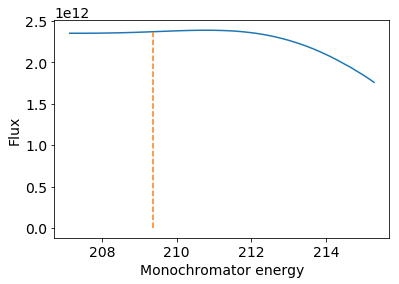

In [27]:
firstHarmonicTable = {}
firstHarmonicTable['gap'] = []
firstHarmonicTable['hv'] = []
firstHarmonicTable['flux'] = []

lookupTable = 'BaluFlux_Oct2018.txt'

for index,entry in enumerate(entries):
    print("--------------------")
    scan=scanSet[index]
    print("Entry number",entry)
    print("Gap=",gaps[index])
    firstHarmonicEnergy=lookupHarmonicEnergy(lookupTable,gaps[index],1)
    print("First harmonic should be at {0:.2f}eV".format(firstHarmonicEnergy))
    experiment_flux ,experiment_hv= maxInSubset(scan['mono_energy_calibrated'],scan['flux'],firstHarmonicEnergy-2,firstHarmonicEnergy+2)
    print("I think the actual maximum is at {0:.2f}ev, with flux {1:.2e}".format(experiment_hv,experiment_flux)) 
    
    firstHarmonicTable['gap'].append(gaps[index])
    firstHarmonicTable['hv'].append(experiment_hv)
    firstHarmonicTable['flux'].append(experiment_flux)
    
    fig=plt.figure()
    plt.plot(scan['mono_energy_calibrated'],scan['flux'])
    plt.plot([experiment_hv,experiment_hv],[0,experiment_flux],linestyle='--')
    plt.ylabel('Flux')
    plt.xlabel('Monochromator energy')
    plt.show()




NameError: name 'tb_firstHarmonic' is not defined

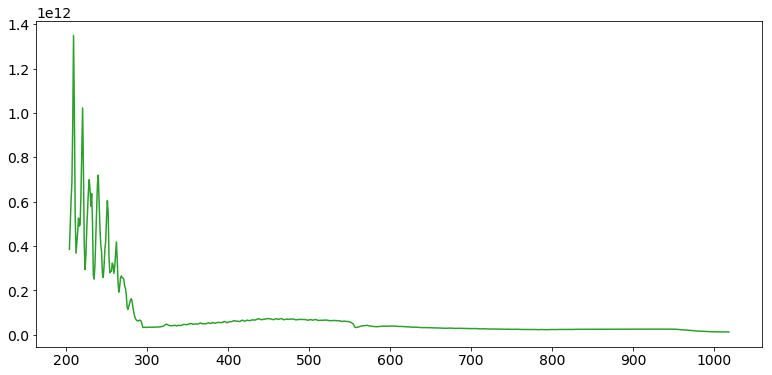

In [28]:
fig=plt.figure(figsize=(13,6))
plt.plot(wigglerMode19mm['mono_energy_calibrated'],wigglerMode19mm['flux'],color='tab:green',label='19mm wiggler mode')
plt.plot(tb_firstHarmonic,tb_flux,'bo',label='First harmonic')
plt.plot(thirdHarmonicTable['hv'],thirdHarmonicTable['flux'],'ro',label='Third harmonic')
plt.plot(firstHarmonicTable['hv'],firstHarmonicTable['flux'],'go',label='First harmonic (latest)')
plt.ylabel('Flux')
plt.legend()
plt.yscale('log')
#plt.xlim([10,400])
#plt.ylim([1.2e10,2e13])
plt.xlabel('Mono energy')
plt.show()


In [61]:
#f=open("HPOLfundamental.txt",'w')
#f.write("EPU gap (mm)\tFundamental position (eV)\tFlux (photons/s)\n")
#for index,element in enumerate(firstHarmonicTable['gap']):
#    f.write("{0:2.1f}\t{1:2.2f}\t{2:2.3e}\n".format(element,firstHarmonicTable['hv'][index],firstHarmonicTable['flux'][index]))
#f.close()

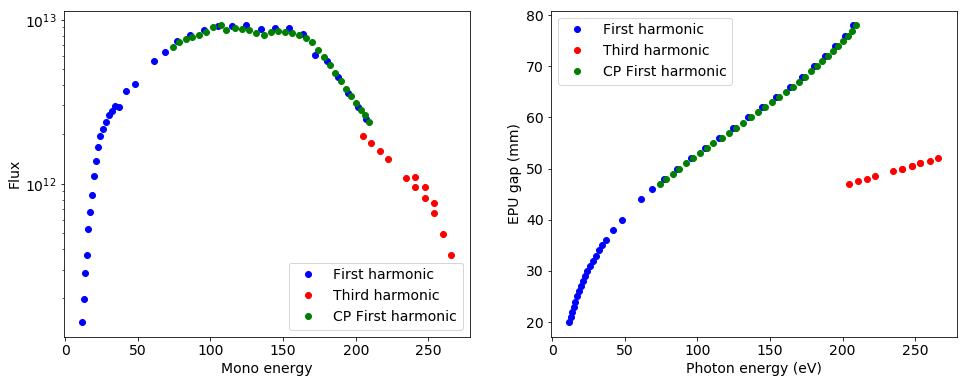

In [29]:
fig=plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(tb_firstHarmonic,tb_flux,'bo',label='First harmonic')
plt.plot(thirdHarmonicTable['hv'],thirdHarmonicTable['flux'],'ro',label='Third harmonic')
plt.plot(firstHarmonicTable['hv'],firstHarmonicTable['flux'],'go',label='CP First harmonic')
plt.ylabel('Flux')
plt.legend()
plt.yscale('log')
#plt.xlim([10,280])
#plt.ylim([1e10,3e14])
plt.xlabel('Mono energy')

plt.subplot(1,2,2)
plt.plot(tb_firstHarmonic,tb_gap,'bo',label="First harmonic")
plt.plot(thirdHarmonicTable['hv'],thirdHarmonicTable['gap'],'ro',label="Third harmonic")
plt.plot(firstHarmonicTable['hv'],firstHarmonicTable['gap'],'go',label='CP First harmonic')
plt.ylabel('EPU gap (mm)')
plt.xlabel('Photon energy (eV)')
plt.legend()
plt.title("")
plt.show()


In [3]:
scanSet = []
dataFile=loadHDF5(data_folder/"cp20c.h5")

entries = [n for n in range(2446,2451+1)]
gaps = [n for n in range(79,85+1)]


for entryNumber in entries:
    scanSet.append(loadAllDatasetsFromScan(dataFile,entryNumber))
    scanSet[-1]['mono_energy_calibrated']=calibrateMonoEnergy(scanSet[-1]['mono_energy'])
    scanSet[-1]['diodeCurrent'] = [((ii*-1)/10000) for ii in scanSet[-1]['b110a_ctl_em02_ch03']]
    # 1.5uA on the alba is showing up as 0. 
    scanSet[-1]['flux'] = [currentToFlux(I,hv) for I,hv in zip(scanSet[-1]['diodeCurrent'],scanSet[-1]['mono_energy_calibrated'])]
dataFile.close()

try: print("entry{0} had gap {1:2.1f}".format(entries[0],scanSet[0]['EPU_R1_110_GAPposition'][-1]))
except: print("entry{0} has unknown gap".format(entries[0]))
try: print("entry{0} had gap {1:2.1f}".format(entries[-1],scanSet[-1]['EPU_R1_110_GAPposition'][-1]))
except: print("entry{0} has unknown gap".format(entries[-1]))

Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
Implementing mono calibration according to Mats, May 2018
entry2446 had gap 79.0
entry2451 had gap 84.0


In [39]:
2451-2445

6

--------------------
Entry number 2446
Gap= 79
hvmax= 213.45209902591225


<IPython.core.display.Javascript object>


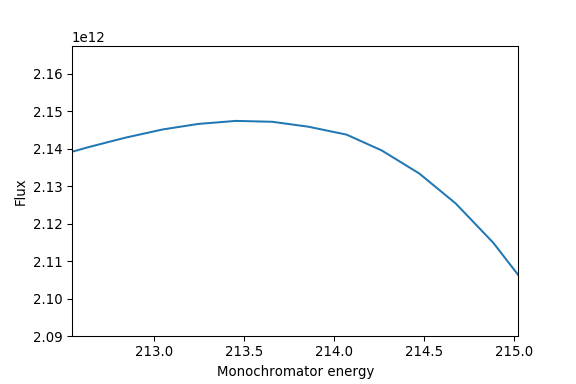

--------------------
Entry number 2447
Gap= 80
hvmax= 216.09775881833914


<IPython.core.display.Javascript object>


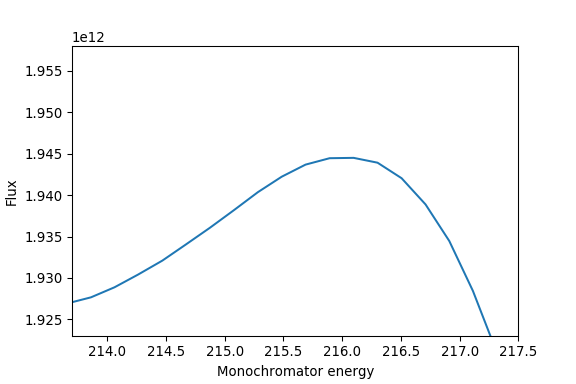

--------------------
Entry number 2448
Gap= 81
hvmax= 218.5422804865668


<IPython.core.display.Javascript object>


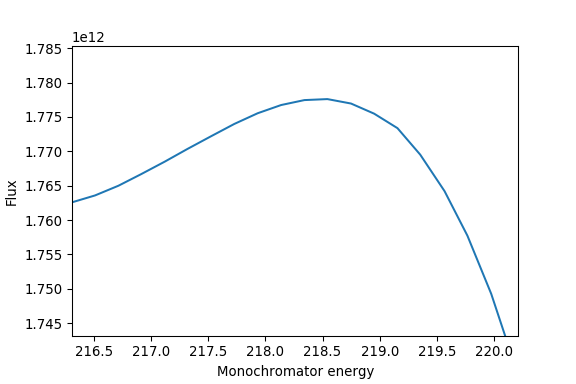

--------------------
Entry number 2449
Gap= 82
hvmax= 214.46772407043875


<IPython.core.display.Javascript object>


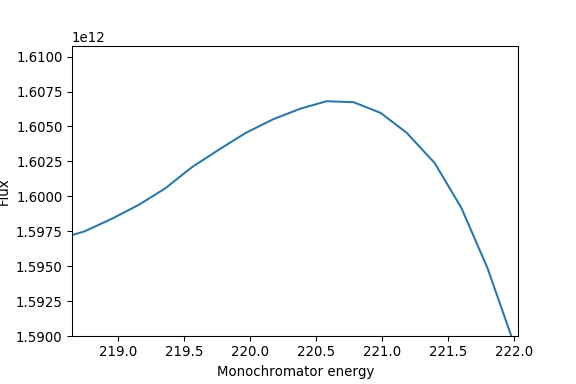

--------------------
Entry number 2450
Gap= 83
hvmax= 216.5080476444905


<IPython.core.display.Javascript object>


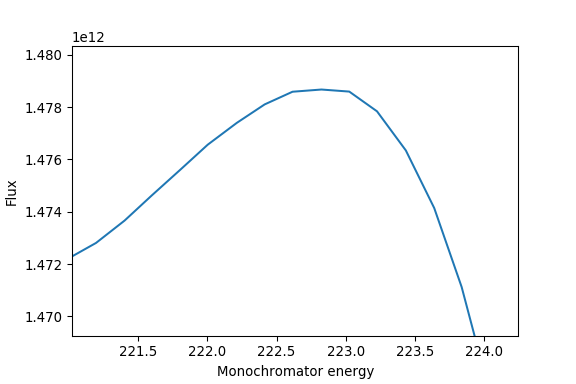

--------------------
Entry number 2451
Gap= 84
hvmax= 218.1341549043044


<IPython.core.display.Javascript object>


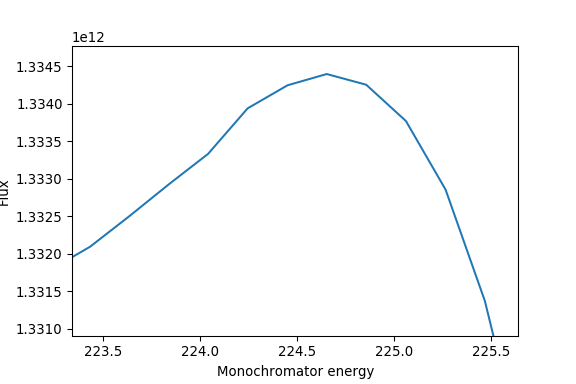

In [4]:
%matplotlib notebook
for index,entry in enumerate(entries):
    print("--------------------")
    scan=scanSet[index]
    print("Entry number",entry)
    print("Gap=",gaps[index])
    print("hvmax=",scan['mono_energy_calibrated'][scan['flux'].index(max(scan['flux']))])
    #firstHarmonicEnergy=lookupHarmonicEnergy(gaps[index],1)
    #print("First harmonic should be at",lookupHarmonicEnergy(gaps[index],1))
    #experiment_flux ,experiment_hv= maxInSubset(scan['mono_energy_calibrated'],scan['flux'],lookupHarmonicEnergy(gaps[index],1)-2,lookupHarmonicEnergy(gaps[index],1)+2)
    #print("I think the actual maximum is (hv,flux)=",experiment_hv,experiment_flux)
    
    #firstHarmonicTable['gap'].append(gaps[index])
    #firstHarmonicTable['hv'].append(experiment_hv)
    #firstHarmonicTable['flux'].append(experiment_flux)
    
    fig=plt.figure()
    plt.plot(scan['mono_energy_calibrated'],scan['flux'])
    plt.ylabel('Flux')
    plt.xlabel('Monochromator energy')
    plt.show()




In [63]:
def hpol_gap_lookup(lookupTable,hv):
    thirdHarmonicThreshold =  224
    wigglerThreshold = 250
    
    if hv < thirdHarmonicThreshold:
        pass
    elif hv < wigglerThreshold:
        pass
    else:
        gap = 19.0
        print("hv = {0}\tGap = {1}\t(Wiggler mode)".format(hv,gap))
    

In [66]:
hpol_gap_lookup('blah',300)

hv = 300	Gap = 19.0	(Wiggler mode)


In [38]:
dataFile=loadHDF5(data_folder/"vpol_first_harmonics3.h5")
listScansInFile(dataFile)
dataFile.close()

This hdf5 file contains the following scans:
	 2676
	 2677
	 2678
	 2679
	 2680
	 2681
	 2682
	 2683
	 2684
	 2685
	 2686
	 2687
	 2688
	 2689
	 2690
	 2691
	 2692
	 2693
	 2694
	 2695
	 2696
	 2697
	 2698
	 2699
	 2700
	 2701
	 2702
	 2703
	 2704
	 2705
	 2706
	 2707
	 2708
	 2709
	 2710
	 2711
	 2712
	 2713
	 2714
	 2715
	 2716
	 2717
	 2718
	 2719
	 2720


In [19]:
dataFile=loadHDF5(data_folder/"vpol_first_harmonics3.h5")
for scanNumber in range(2630,2675):
    scan=loadAllDatasetsFromScan(dataFile,scanNumber)
    try: print("entry{0} had gap {1:2.1f}".format(scanNumber,scan['EPU_R1_110_GAPposition'][-1]))
    except: print("entry{0} has unknown gap".format(scanNumber))
    
dataFile.close()


entry2630 had gap 22.0
entry2631 had gap 23.0
entry2632 had gap 24.0
entry2633 had gap 25.0
entry2634 had gap 26.0
entry2635 had gap 27.0
entry2636 had gap 28.0
entry2637 had gap 29.0
entry2638 had gap 30.0
entry2639 had gap 31.0
entry2640 had gap 32.0
entry2641 had gap 33.0
entry2642 had gap 34.0
entry2643 had gap 35.0
entry2644 had gap 36.0
entry2645 had gap 37.0
entry2646 had gap 38.0
entry2647 had gap 39.0
entry2648 had gap 40.0
entry2649 had gap 41.0
entry2650 had gap 42.0
entry2651 had gap 43.0
entry2652 had gap 44.0
entry2653 had gap 45.0
entry2654 had gap 46.0
entry2655 had gap 47.0
entry2656 had gap 48.0
entry2657 had gap 49.0
entry2658 had gap 50.0
entry2659 had gap 51.0
entry2660 had gap 52.0
entry2661 had gap 53.0
entry2662 had gap 54.0
entry2663 had gap 55.0
entry2664 had gap 56.0
entry2665 had gap 57.0
entry2666 had gap 58.0
entry2667 had gap 59.0
entry2668 had gap 60.0
entry2669 had gap 61.0
entry2670 had gap 62.0
entry2671 had gap 63.0
entry2672 had gap 64.0
entry2673 h

In [39]:
scanSet = []
dataFile=loadHDF5(data_folder/"vpol_first_harmonics3.h5")

entries = [n for n in range(2676,2720+1)]
gaps = [n for n in range(22,66+1)]

for entryNumber in entries:
    scanSet.append(loadAllDatasetsFromScan(dataFile,entryNumber))
    #scanSet[-1]['mono_energy_calibrated']=calibrateMonoEnergy(scanSet[-1]['mono_energy'])
    scanSet[-1]['mono_energy_calibrated']=scanSet[-1]['mono_energy']
    scanSet[-1]['diodeCurrent'] = [((ii*-1)/10000) for ii in scanSet[-1]['b110a_ctl_em02_ch03']]
    # 1.5uA on the alba is showing up as 0. 
    scanSet[-1]['flux'] = [currentToFlux(I,hv) for I,hv in zip(scanSet[-1]['diodeCurrent'],scanSet[-1]['mono_energy_calibrated'])]
dataFile.close()

try: print("entry{0} had gap {1:2.1f}".format(entries[0],scanSet[0]['EPU_R1_110_GAPposition'][-1]))
except: print("entry{0} has unknown gap".format(entries[0]))
try: print("entry{0} had gap {1:2.1f}".format(entries[-1],scanSet[-1]['EPU_R1_110_GAPposition'][-1]))
except: print("entry{0} has unknown gap".format(entries[-1]))

entry2676 had gap 22.0
entry2720 had gap 66.0


--------------------
Entry number 2676
Gap= 22
hvmax= 30.000314701289774


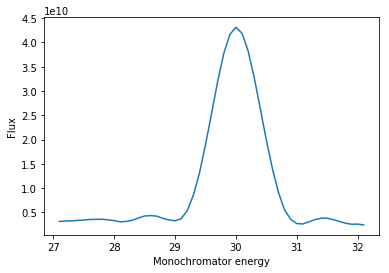

--------------------
Entry number 2677
Gap= 23
hvmax= 33.29911672238962


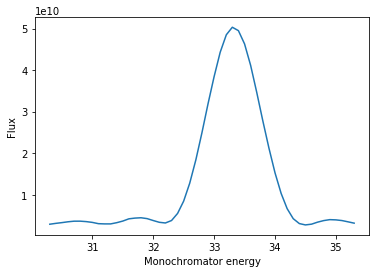

--------------------
Entry number 2678
Gap= 24
hvmax= 36.90028342842993


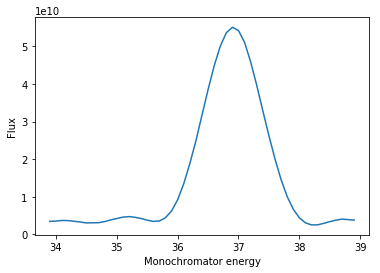

--------------------
Entry number 2679
Gap= 25
hvmax= 40.800503279788806


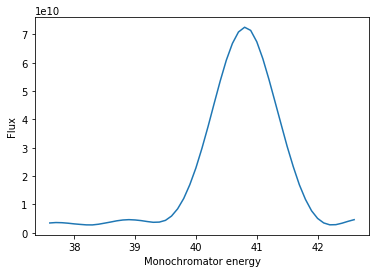

--------------------
Entry number 2680
Gap= 26
hvmax= 44.89952304295594


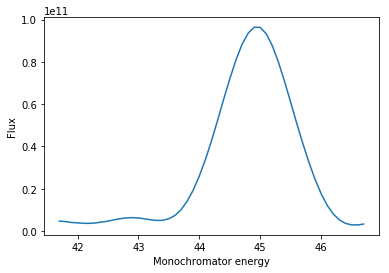

--------------------
Entry number 2681
Gap= 27
hvmax= 49.39943132303861


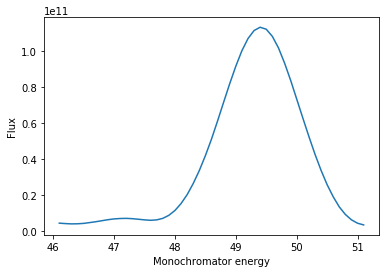

--------------------
Entry number 2682
Gap= 28
hvmax= 54.099108618833725


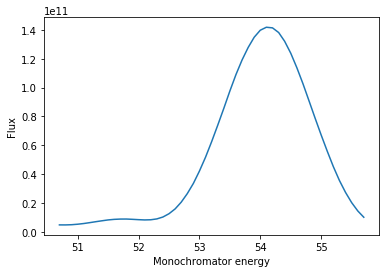

--------------------
Entry number 2683
Gap= 29
hvmax= 59.20084689522939


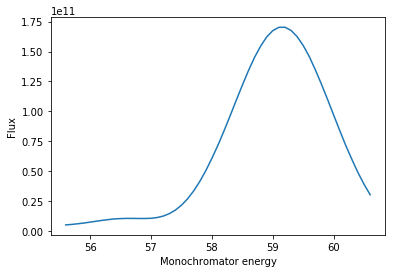

--------------------
Entry number 2684
Gap= 30
hvmax= 64.5003522674684


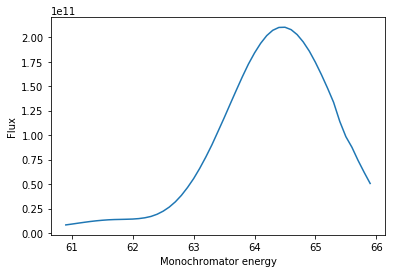

--------------------
Entry number 2685
Gap= 31
hvmax= 69.99923833298001


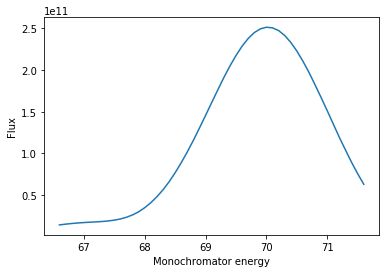

--------------------
Entry number 2686
Gap= 32
hvmax= 75.79931479551846


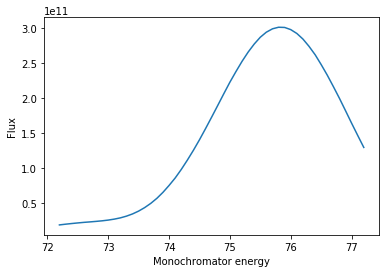

--------------------
Entry number 2687
Gap= 33
hvmax= 81.9016729012193


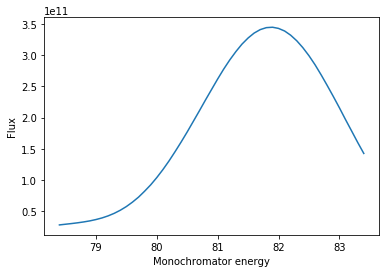

--------------------
Entry number 2688
Gap= 34
hvmax= 88.09816944473114


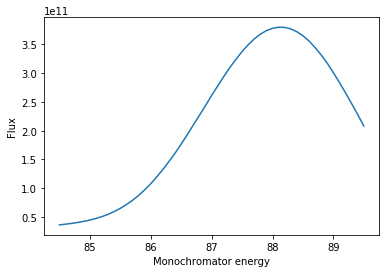

--------------------
Entry number 2689
Gap= 35
hvmax= 94.60028178291174


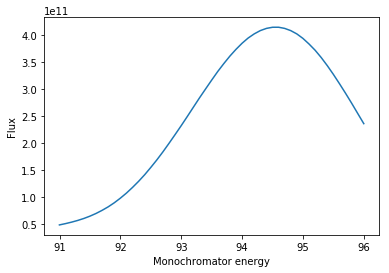

--------------------
Entry number 2690
Gap= 36
hvmax= 101.10168825621204


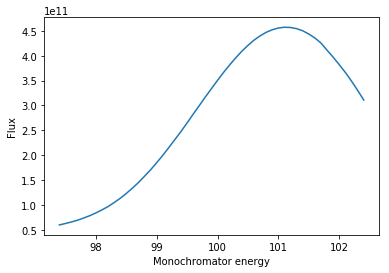

--------------------
Entry number 2691
Gap= 37
hvmax= 107.79910254906447


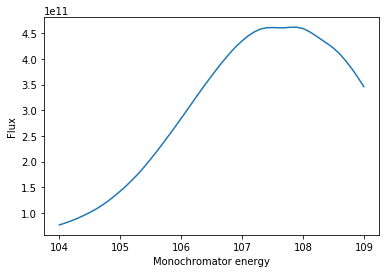

--------------------
Entry number 2692
Gap= 38
hvmax= 114.4992751613645


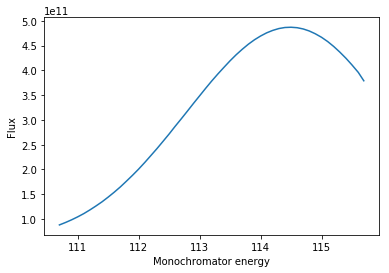

--------------------
Entry number 2693
Gap= 39
hvmax= 121.29862840856276


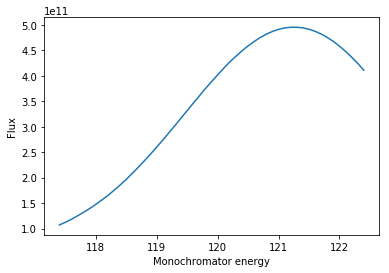

--------------------
Entry number 2694
Gap= 40
hvmax= 127.9800875838141


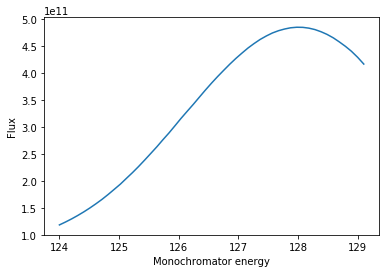

--------------------
Entry number 2695
Gap= 41
hvmax= 134.7003516103877


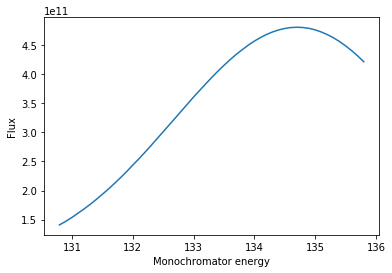

--------------------
Entry number 2696
Gap= 42
hvmax= 141.19792128790712


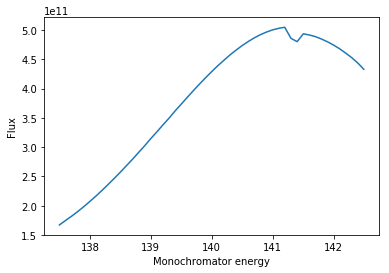

--------------------
Entry number 2697
Gap= 43
hvmax= 147.8024766021263


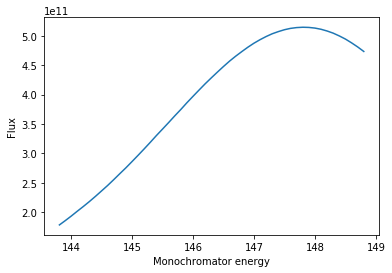

--------------------
Entry number 2698
Gap= 44
hvmax= 154.09967488346464


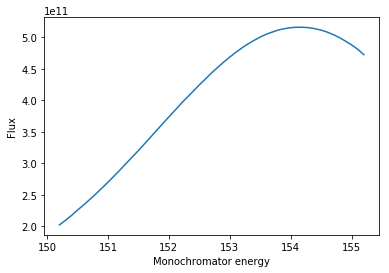

--------------------
Entry number 2699
Gap= 45
hvmax= 160.199077126889


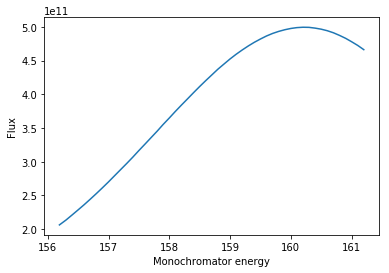

--------------------
Entry number 2700
Gap= 46
hvmax= 166.2001246643366


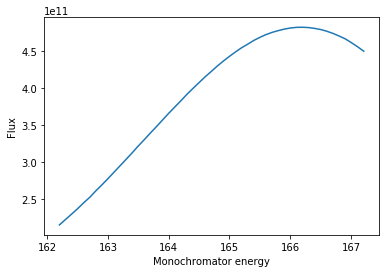

--------------------
Entry number 2701
Gap= 47
hvmax= 171.80157525672902


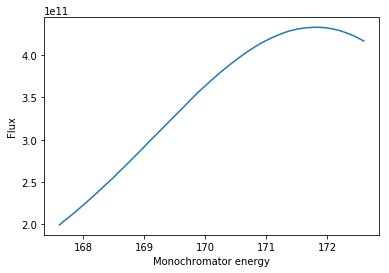

--------------------
Entry number 2702
Gap= 48
hvmax= 177.2979733269514


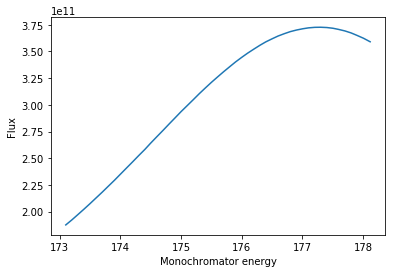

--------------------
Entry number 2703
Gap= 49
hvmax= 182.4970560161826


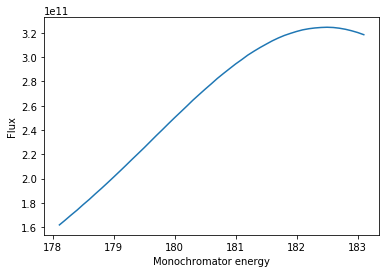

--------------------
Entry number 2704
Gap= 50
hvmax= 187.49945707305568


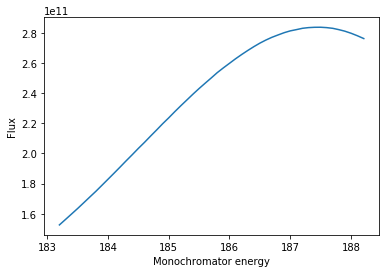

--------------------
Entry number 2705
Gap= 51
hvmax= 192.09995942459605


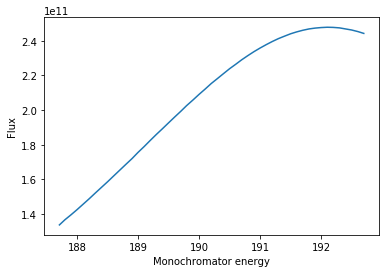

--------------------
Entry number 2706
Gap= 52
hvmax= 196.59588100464293


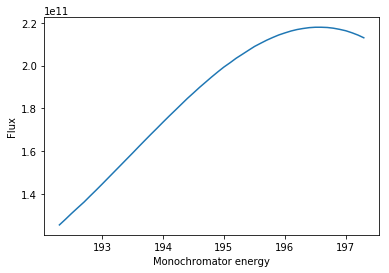

--------------------
Entry number 2707
Gap= 53
hvmax= 200.69806825652694


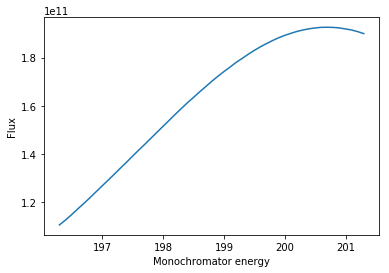

--------------------
Entry number 2708
Gap= 54
hvmax= 204.5926547792732


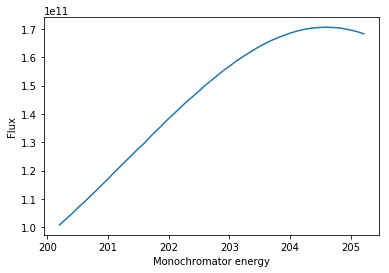

--------------------
Entry number 2709
Gap= 55
hvmax= 208.19895637417076


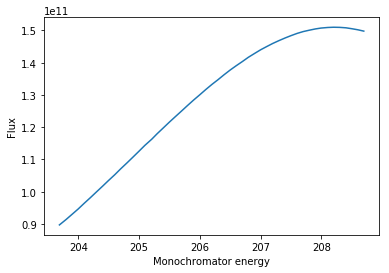

--------------------
Entry number 2710
Gap= 56
hvmax= 211.09942148267476


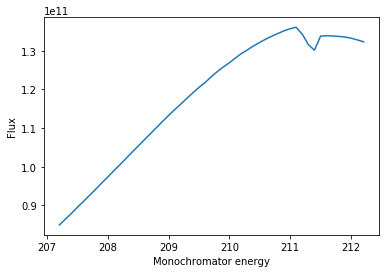

--------------------
Entry number 2711
Gap= 57
hvmax= 214.80011452990547


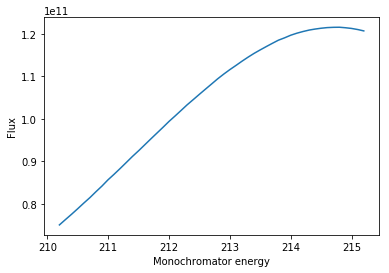

--------------------
Entry number 2712
Gap= 58
hvmax= 217.59634228061478


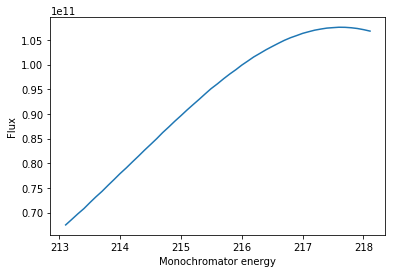

--------------------
Entry number 2713
Gap= 59
hvmax= 220.39823498866784


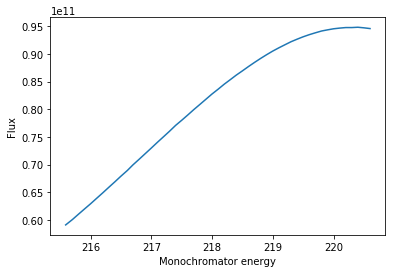

--------------------
Entry number 2714
Gap= 60
hvmax= 222.80117279678956


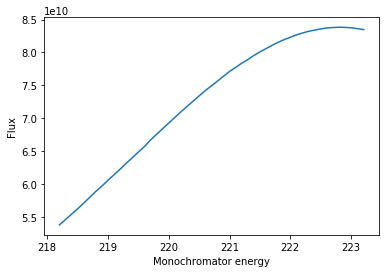

--------------------
Entry number 2715
Gap= 61
hvmax= 225.09935014517265


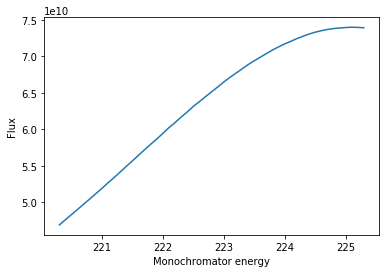

--------------------
Entry number 2716
Gap= 62
hvmax= 227.20067447843527


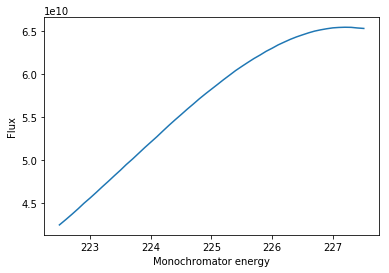

--------------------
Entry number 2717
Gap= 63
hvmax= 229.1985686025475


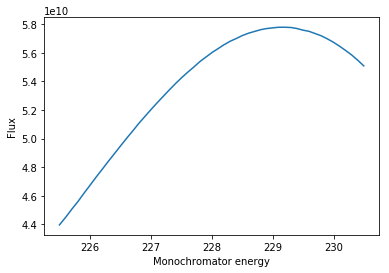

--------------------
Entry number 2718
Gap= 64
hvmax= 230.90272144305868


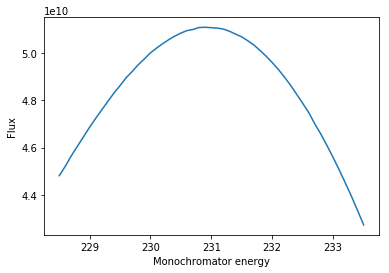

--------------------
Entry number 2719
Gap= 65
hvmax= 232.59747920184932


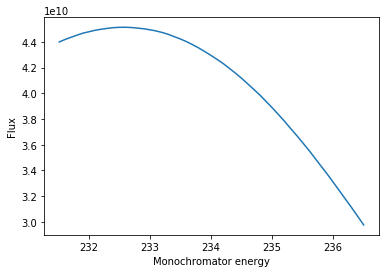

--------------------
Entry number 2720
Gap= 66
hvmax= 234.49914647255727


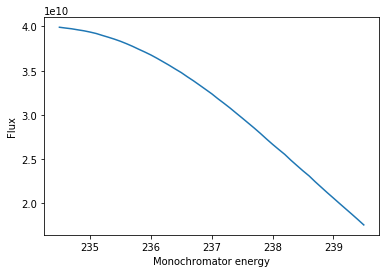

In [40]:
%matplotlib inline

narrowfirstHarmonicTable = {}
narrowfirstHarmonicTable['gap'] = []
narrowfirstHarmonicTable['hv'] = []
narrowfirstHarmonicTable['flux'] = []

for index,entry in enumerate(entries):
    print("--------------------")
    scan=scanSet[index]
    print("Entry number",entry)
    print("Gap=",gaps[index])
    experiment_hv = scan['mono_energy_calibrated'][scan['flux'].index(max(scan['flux']))]
    print("hvmax=",experiment_hv)
    experiment_flux = max(scan['flux'])
    #firstHarmonicEnergy=lookupHarmonicEnergy(gaps[index],1)
    #print("First harmonic should be at",lookupHarmonicEnergy(gaps[index],1))
    #experiment_flux ,experiment_hv= maxInSubset(scan['mono_energy_calibrated'],scan['flux'],lookupHarmonicEnergy(gaps[index],1)-2,lookupHarmonicEnergy(gaps[index],1)+2)
    #print("I think the actual maximum is (hv,flux)=",experiment_hv,experiment_flux)
    
    narrowfirstHarmonicTable['gap'].append(gaps[index])
    narrowfirstHarmonicTable['hv'].append(experiment_hv)
    narrowfirstHarmonicTable['flux'].append(experiment_flux)
    
    fig=plt.figure()
    plt.plot(scan['mono_energy_calibrated'],scan['flux'])
    plt.ylabel('Flux')
    plt.xlabel('Monochromator energy')
    plt.show()




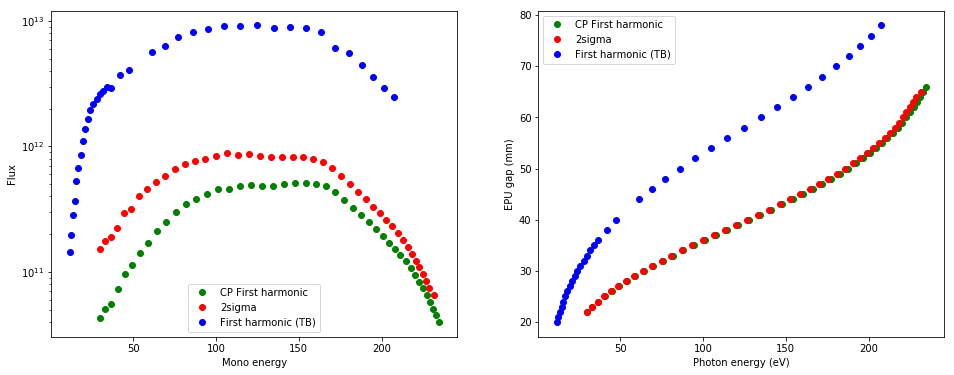

In [29]:
fig=plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.plot(narrowfirstHarmonicTable['hv'],narrowfirstHarmonicTable['flux'],'go',label='CP First harmonic')
plt.plot(fatfirstHarmonicTable['hv'],fatfirstHarmonicTable['flux'],'ro',label='2sigma')
plt.plot(tb_firstHarmonic,tb_flux,'bo',label='First harmonic (TB)')
plt.ylabel('Flux')
plt.legend()
plt.yscale('log')
#plt.xlim([10,280])
#plt.ylim([1e10,3e14])
plt.xlabel('Mono energy')

plt.subplot(1,2,2)
plt.plot(narrowfirstHarmonicTable['hv'],narrowfirstHarmonicTable['gap'],'go',label='CP First harmonic')
plt.plot(fatfirstHarmonicTable['hv'],fatfirstHarmonicTable['gap'],'ro',label='2sigma')
plt.plot(tb_firstHarmonic,tb_gap,'bo',label='First harmonic (TB)')
plt.ylabel('EPU gap (mm)')
plt.xlabel('Photon energy (eV)')
plt.legend()
plt.title("")
plt.show()


In [32]:
1.84+0.72

2.56

In [31]:
for index,element in enumerate(narrowfirstHarmonicTable['gap']):
    print(narrowfirstHarmonicTable['gap'][index],narrowfirstHarmonicTable['hv'][index],fatfirstHarmonicTable['hv'][index])

22 30.000314701289774 29.699597371899447
23 33.29911672238962 32.99933761267414
24 36.90028342842993 36.4998870776264
25 40.800503279788806 40.399820085153635
26 44.89952304295594 44.399942626154825
27 49.39943132303861 48.899766427675665
28 54.099108618833725 53.49958674451539
29 59.20084689522939 58.499794197275904
30 64.5003522674684 63.69871280585717
31 69.99923833298001 69.19941419404732
32 75.79931479551846 74.99989595946931
33 81.9016729012193 81.00079285108279
34 88.09816944473114 87.09908422593138
35 94.60028178291174 93.50114592877458
36 101.10168825621204 100.0999979900963
37 107.79910254906447 106.60164734726494
38 114.4992751613645 113.30176790373834
39 121.29862840856276 120.09855415222506
40 127.9800875838141 126.7531603243921
41 134.7003516103877 133.4008389882148
42 141.19792128790712 140.09775738646758
43 147.8024766021263 146.49723260229362
44 154.09967488346464 152.794214003109
45 160.199077126889 158.79972073030044
46 166.2001246643366 164.79833232231158
47 171.801

IndexError: list index out of range

In [35]:
f=open("vpol_new_table.txt",'w')
f.write("EPU gap (mm)\tFundamental position (eV)\n")
for index,element in enumerate(narrowfirstHarmonicTable['gap']):
    f.write("{0}\t{1:.2f}\n".format(narrowfirstHarmonicTable['gap'][index],narrowfirstHarmonicTable['hv'][index]))
f.close()

In [36]:
scanSet = []
dataFile=loadHDF5(data_folder/"vpol_first_harmonics2.h5")

entries = [n for n in range(2630,2673+1)]
gaps = [n for n in range(22,66+1)]

for entryNumber in entries:
    scanSet.append(loadAllDatasetsFromScan(dataFile,entryNumber))
    #scanSet[-1]['mono_energy_calibrated']=calibrateMonoEnergy(scanSet[-1]['mono_energy'])
    scanSet[-1]['mono_energy_calibrated']=scanSet[-1]['mono_energy']
    scanSet[-1]['diodeCurrent'] = [((ii*-1)/10000) for ii in scanSet[-1]['b110a_ctl_em02_ch03']]
    # 1.5uA on the alba is showing up as 0. 
    scanSet[-1]['flux'] = [currentToFlux(I,hv) for I,hv in zip(scanSet[-1]['diodeCurrent'],scanSet[-1]['mono_energy_calibrated'])]
dataFile.close()

try: print("entry{0} had gap {1:2.1f}".format(entries[0],scanSet[0]['EPU_R1_110_GAPposition'][-1]))
except: print("entry{0} has unknown gap".format(entries[0]))
try: print("entry{0} had gap {1:2.1f}".format(entries[-1],scanSet[-1]['EPU_R1_110_GAPposition'][-1]))
except: print("entry{0} has unknown gap".format(entries[-1]))

entry2630 had gap 22.0
entry2673 had gap 65.0


--------------------
Entry number 2630
Gap= 22
hvmax= 29.699597371899447


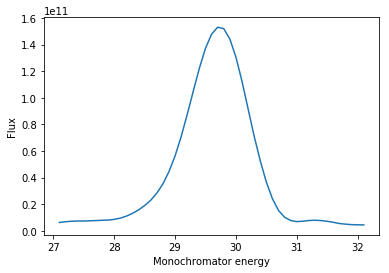

--------------------
Entry number 2631
Gap= 23
hvmax= 32.99933761267414


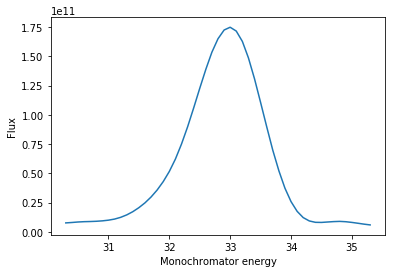

--------------------
Entry number 2632
Gap= 24
hvmax= 36.4998870776264


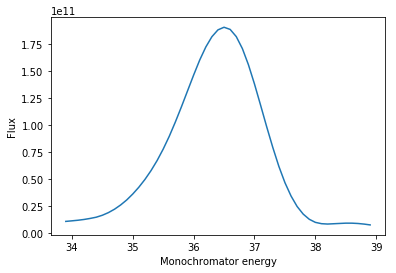

--------------------
Entry number 2633
Gap= 25
hvmax= 40.399820085153635


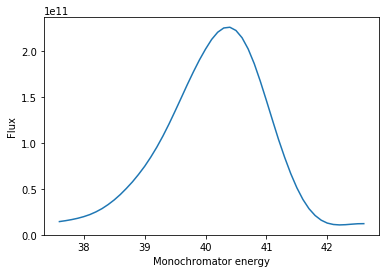

--------------------
Entry number 2634
Gap= 26
hvmax= 44.399942626154825


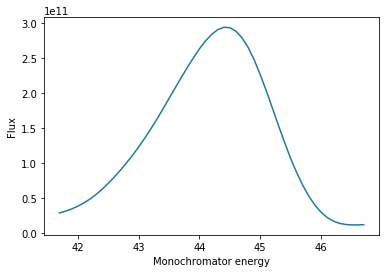

--------------------
Entry number 2635
Gap= 27
hvmax= 48.899766427675665


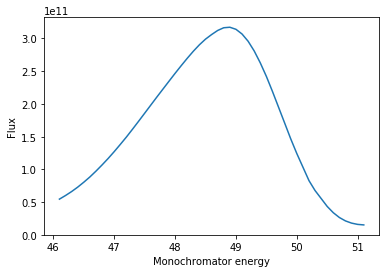

--------------------
Entry number 2636
Gap= 28
hvmax= 53.49958674451539


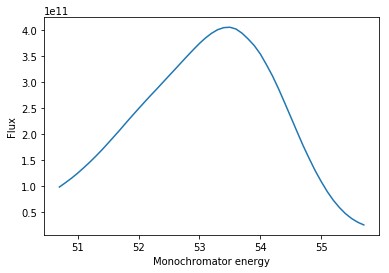

--------------------
Entry number 2637
Gap= 29
hvmax= 58.499794197275904


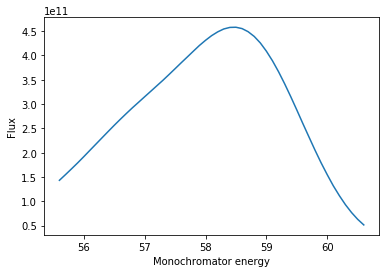

--------------------
Entry number 2638
Gap= 30
hvmax= 63.69871280585717


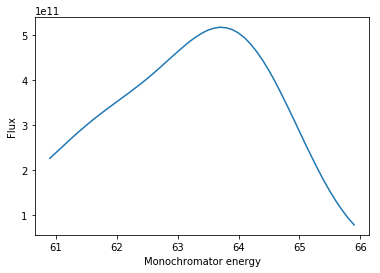

--------------------
Entry number 2639
Gap= 31
hvmax= 69.19941419404732


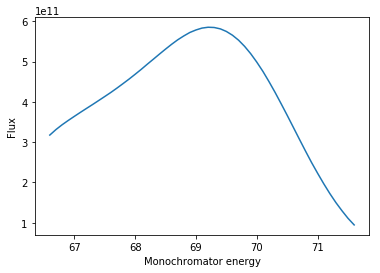

--------------------
Entry number 2640
Gap= 32
hvmax= 74.99989595946931


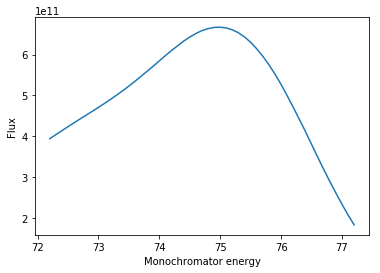

--------------------
Entry number 2641
Gap= 33
hvmax= 81.00079285108279


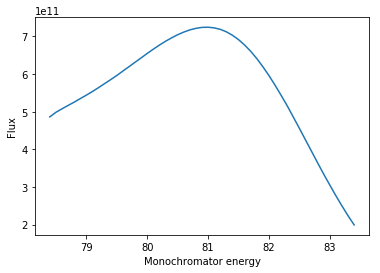

--------------------
Entry number 2642
Gap= 34
hvmax= 87.09908422593138


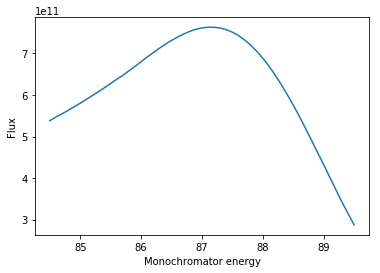

--------------------
Entry number 2643
Gap= 35
hvmax= 93.50114592877458


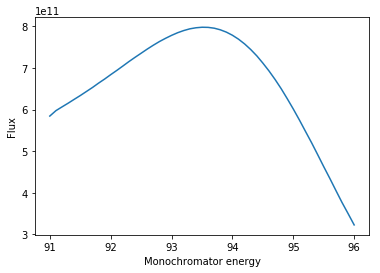

--------------------
Entry number 2644
Gap= 36
hvmax= 100.0999979900963


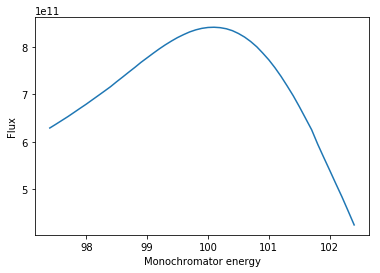

--------------------
Entry number 2645
Gap= 37
hvmax= 106.60164734726494


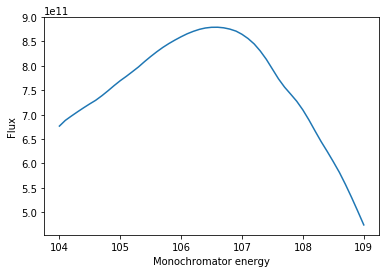

--------------------
Entry number 2646
Gap= 38
hvmax= 113.30176790373834


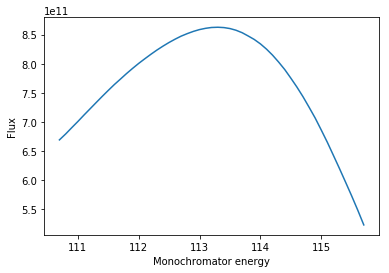

--------------------
Entry number 2647
Gap= 39
hvmax= 120.09855415222506


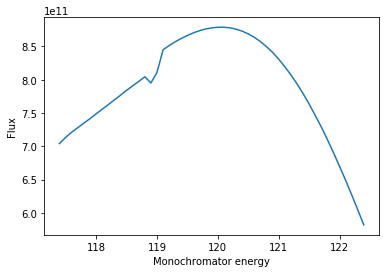

--------------------
Entry number 2648
Gap= 40
hvmax= 126.7531603243921


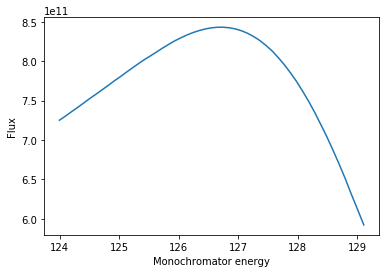

--------------------
Entry number 2649
Gap= 41
hvmax= 133.4008389882148


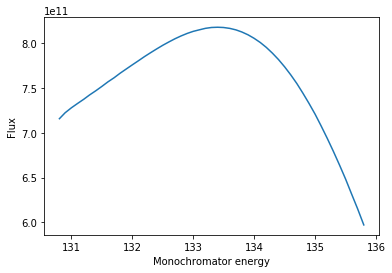

--------------------
Entry number 2650
Gap= 42
hvmax= 140.09775738646758


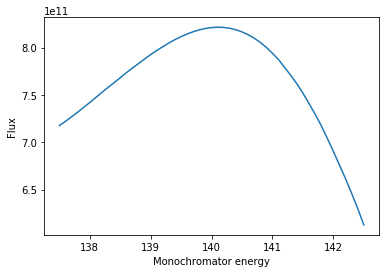

--------------------
Entry number 2651
Gap= 43
hvmax= 146.49723260229362


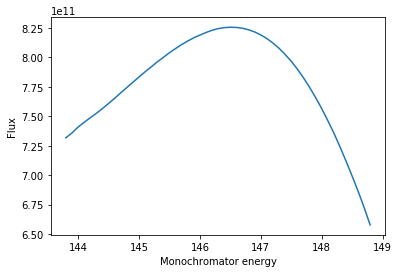

--------------------
Entry number 2652
Gap= 44
hvmax= 152.794214003109


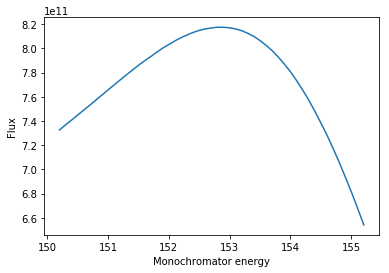

--------------------
Entry number 2653
Gap= 45
hvmax= 158.79972073030044


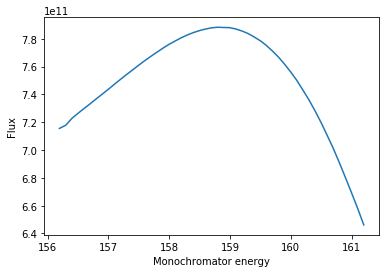

--------------------
Entry number 2654
Gap= 46
hvmax= 164.79833232231158


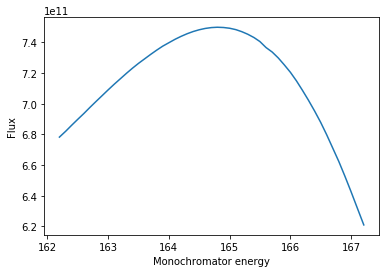

--------------------
Entry number 2655
Gap= 47
hvmax= 170.19954975177106


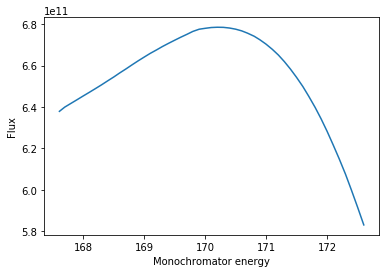

--------------------
Entry number 2656
Gap= 48
hvmax= 175.39959051662063


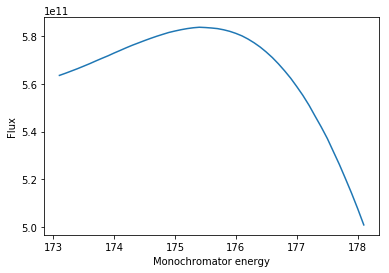

--------------------
Entry number 2657
Gap= 49
hvmax= 180.70351555315682


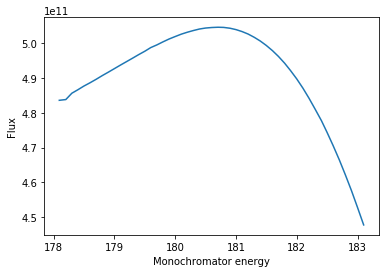

--------------------
Entry number 2658
Gap= 50
hvmax= 185.70308315606488


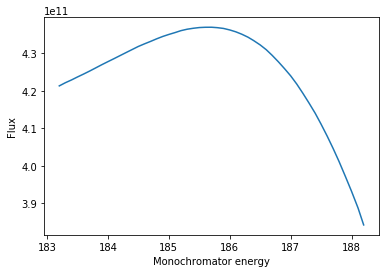

--------------------
Entry number 2659
Gap= 51
hvmax= 190.29563852190427


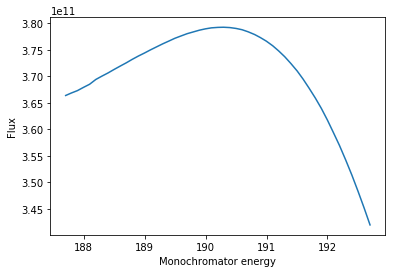

--------------------
Entry number 2660
Gap= 52
hvmax= 194.7012212106313


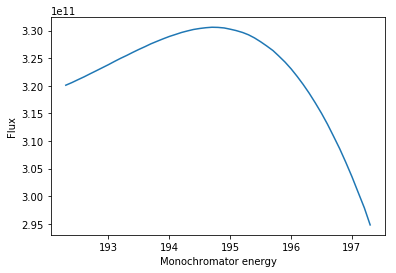

--------------------
Entry number 2661
Gap= 53
hvmax= 198.9026935494047


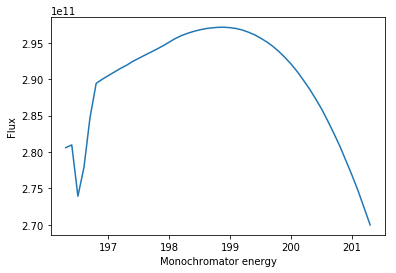

--------------------
Entry number 2662
Gap= 54
hvmax= 202.69936005349703


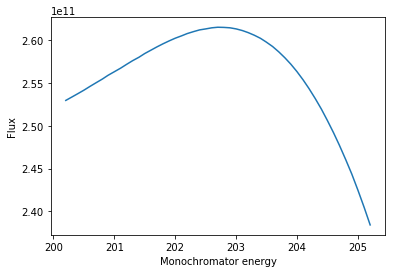

--------------------
Entry number 2663
Gap= 55
hvmax= 206.29748079133864


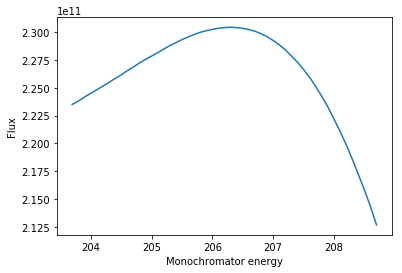

--------------------
Entry number 2664
Gap= 56
hvmax= 209.69718463399659


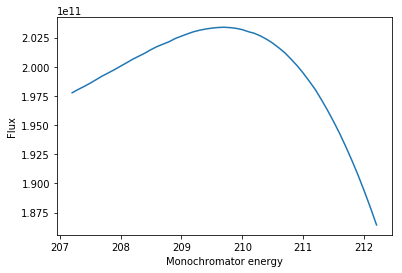

--------------------
Entry number 2665
Gap= 57
hvmax= 212.79675381647166


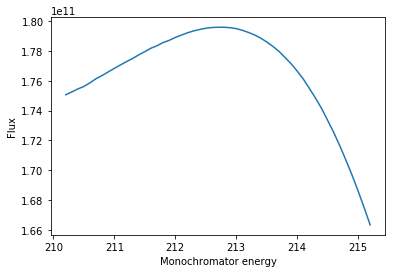

--------------------
Entry number 2666
Gap= 58
hvmax= 215.70166735101907


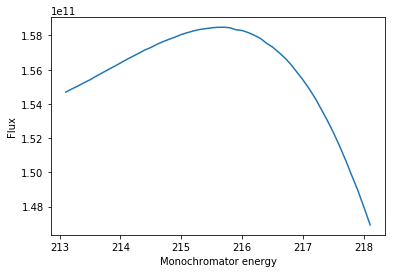

--------------------
Entry number 2667
Gap= 59
hvmax= 218.097873224157


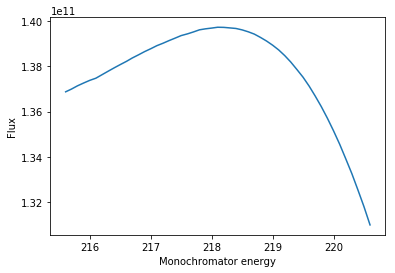

--------------------
Entry number 2668
Gap= 60
hvmax= 220.69085104112256


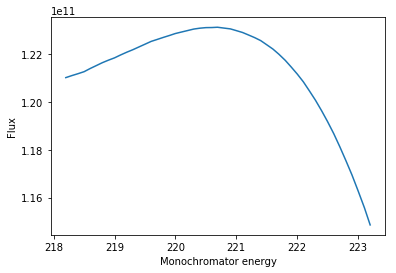

--------------------
Entry number 2669
Gap= 61
hvmax= 222.79941849783148


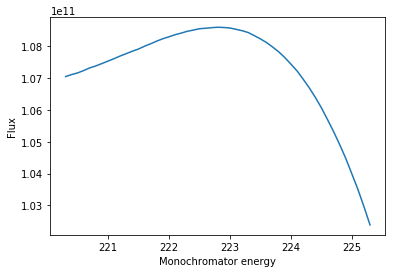

--------------------
Entry number 2670
Gap= 62
hvmax= 224.90155748707403


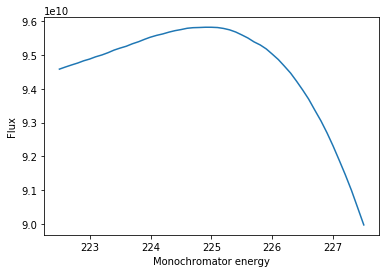

--------------------
Entry number 2671
Gap= 63
hvmax= 226.59643252793492


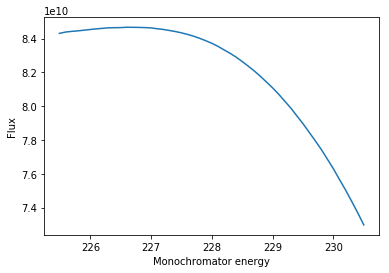

--------------------
Entry number 2672
Gap= 64
hvmax= 228.50199808475153


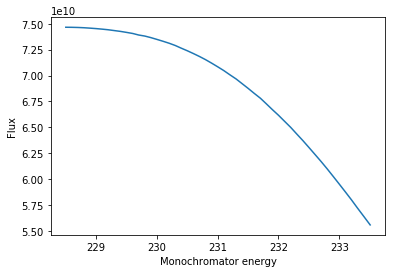

--------------------
Entry number 2673
Gap= 65
hvmax= 231.5099250344545


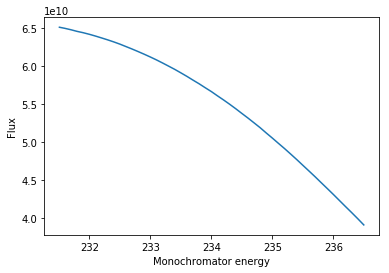

In [37]:
%matplotlib inline

fatfirstHarmonicTable = {}
fatfirstHarmonicTable['gap'] = []
fatfirstHarmonicTable['hv'] = []
fatfirstHarmonicTable['flux'] = []

for index,entry in enumerate(entries):
    print("--------------------")
    scan=scanSet[index]
    print("Entry number",entry)
    print("Gap=",gaps[index])
    experiment_hv = scan['mono_energy_calibrated'][scan['flux'].index(max(scan['flux']))]
    print("hvmax=",experiment_hv)
    experiment_flux = max(scan['flux'])
    #firstHarmonicEnergy=lookupHarmonicEnergy(gaps[index],1)
    #print("First harmonic should be at",lookupHarmonicEnergy(gaps[index],1))
    #experiment_flux ,experiment_hv= maxInSubset(scan['mono_energy_calibrated'],scan['flux'],lookupHarmonicEnergy(gaps[index],1)-2,lookupHarmonicEnergy(gaps[index],1)+2)
    #print("I think the actual maximum is (hv,flux)=",experiment_hv,experiment_flux)
    
    fatfirstHarmonicTable['gap'].append(gaps[index])
    fatfirstHarmonicTable['hv'].append(experiment_hv)
    fatfirstHarmonicTable['flux'].append(experiment_flux)
    
    fig=plt.figure()
    plt.plot(scan['mono_energy_calibrated'],scan['flux'])
    plt.ylabel('Flux')
    plt.xlabel('Monochromator energy')
    plt.show()




***
# Last night's VPOL set

In [ ]:
from lmfit import minimize, Parameters

In [ ]:
###########################
def residual(params, x, y):
###########################
	return (y-Gauss(params,x))

########################
def Gauss(params,x):
########################    
    amplitude = params['amplitude'].value
    center = params['center'].value
    width = params['width'].value
    offset = params['offset'].value

    model = offset + (amplitude*np.exp(-(x-center)**2/(2.*width**2))) 

    return model



******************************** EPU gap 22 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		30.00			4.83e+11
5		29.70			1.55e+12
8		29.60			1.65e+12
11		29.60			1.64e+12


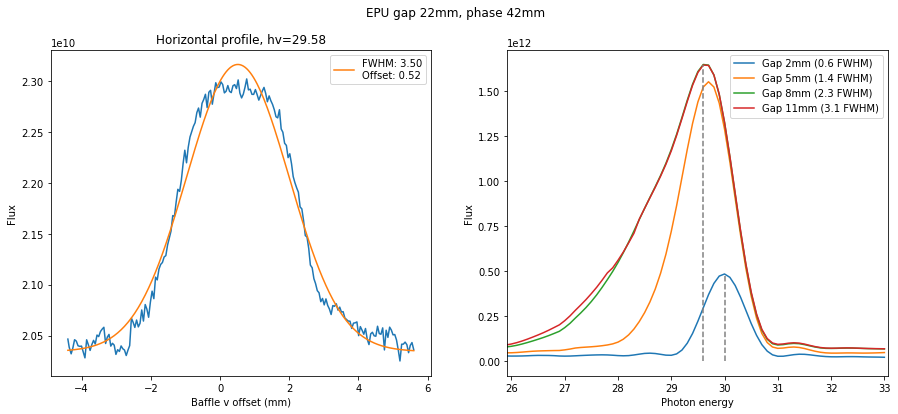



******************************** EPU gap 23 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		33.30			5.30e+11
5		33.00			1.70e+12
8		32.90			1.78e+12
11		32.90			1.76e+12


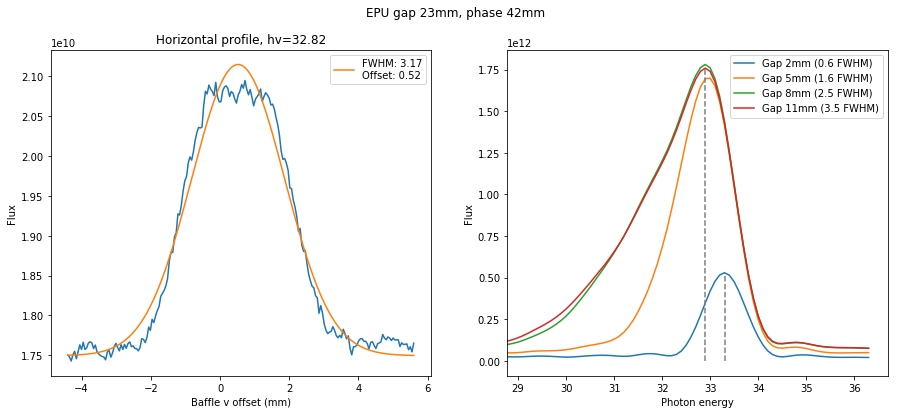



******************************** EPU gap 24 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		36.90			5.28e+11
5		36.50			1.63e+12
8		36.40			1.66e+12
11		36.40			1.65e+12


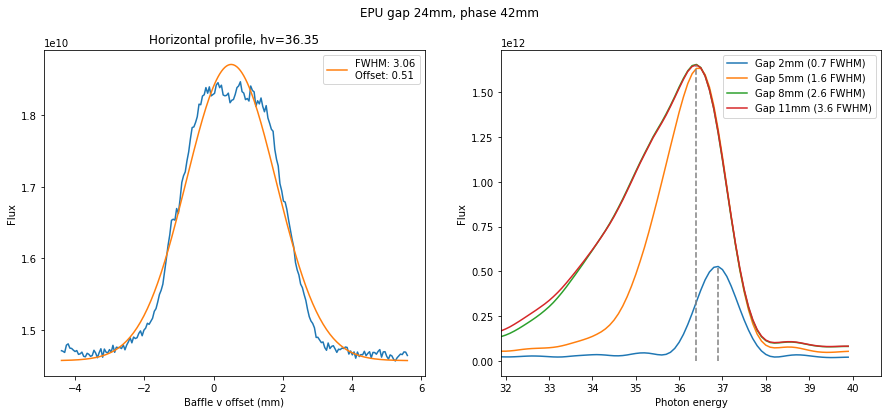



******************************** EPU gap 25 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		40.80			5.39e+11
5		40.30			1.45e+12
8		40.30			1.51e+12
11		40.30			1.61e+12


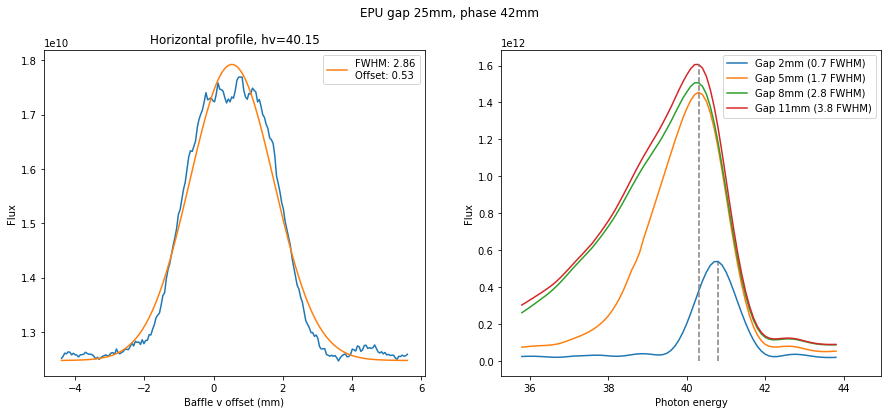



******************************** EPU gap 26 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		44.90			5.02e+11
5		44.30			1.34e+12
8		44.30			1.52e+12
11		44.30			1.50e+12


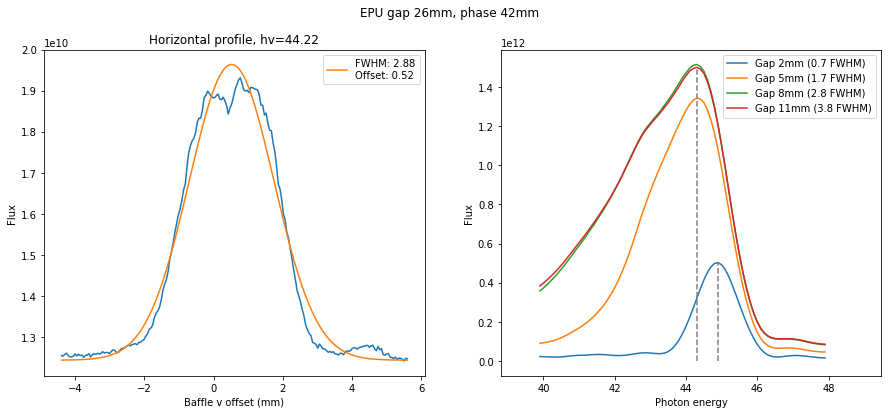



******************************** EPU gap 27 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		49.30			3.87e+11
5		48.70			1.06e+12
8		48.60			1.07e+12
11		48.70			1.01e+12


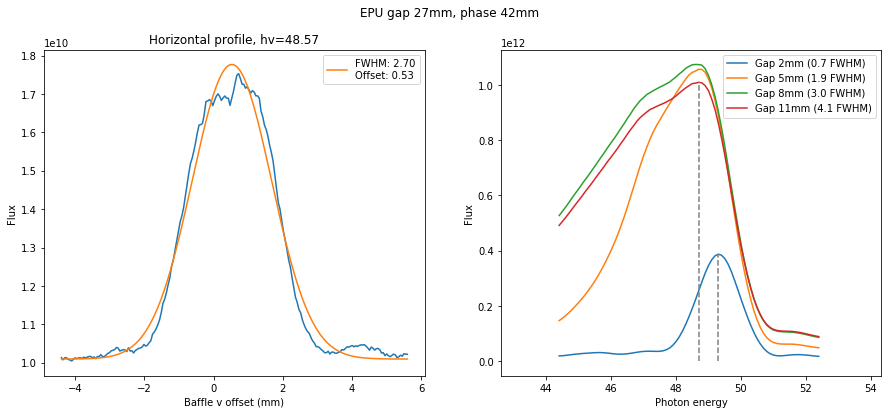



******************************** EPU gap 28 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		54.00			3.40e+11
5		53.30			7.99e+11
8		51.70			7.87e+11
11		53.10			7.73e+11


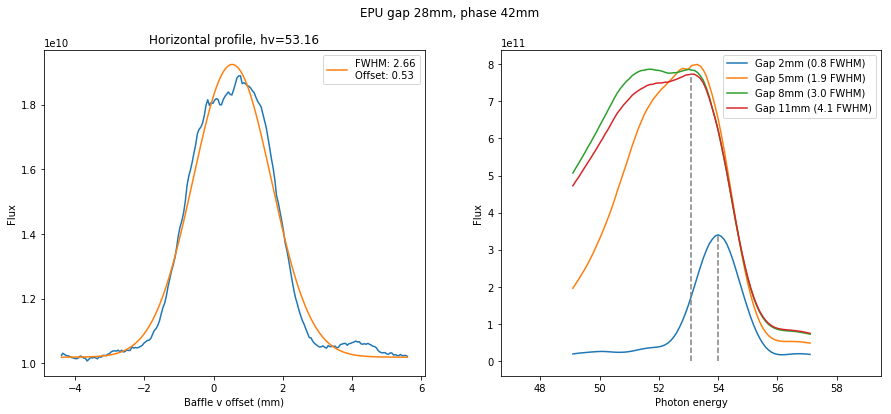



******************************** EPU gap 29 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		59.00			2.44e+11
5		58.20			4.77e+11
8		56.40			5.16e+11
11		56.40			5.00e+11


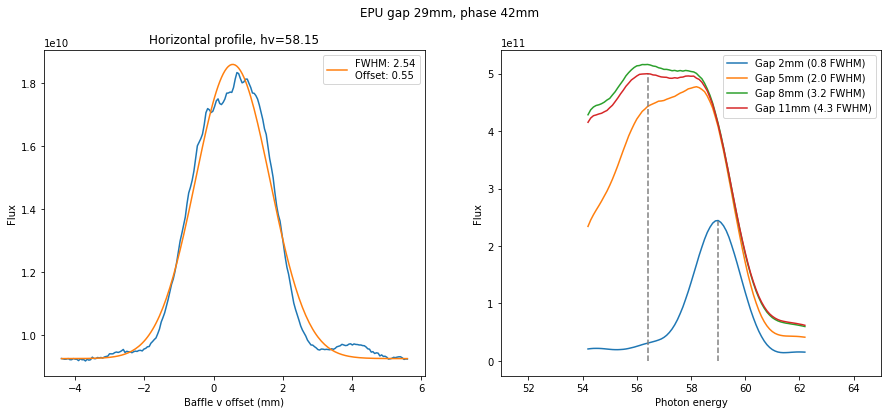



******************************** EPU gap 30 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		64.10			1.60e+11
5		61.40			3.04e+11
8		60.50			3.59e+11
11		60.70			4.00e+11


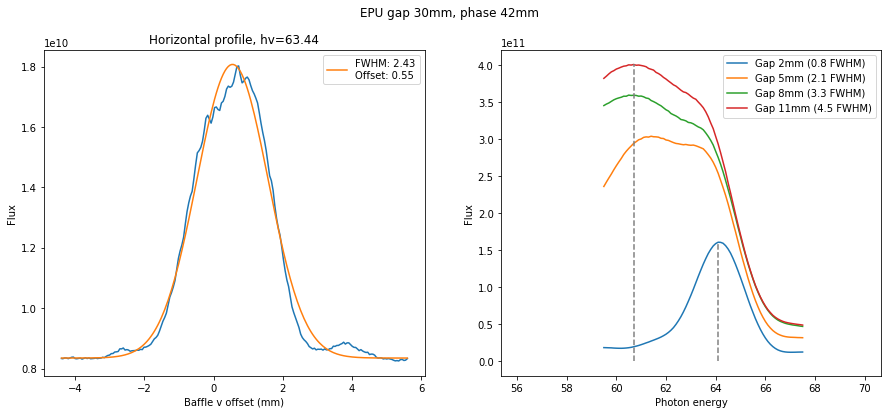



******************************** EPU gap 31 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		69.70			1.02e+11
5		66.00			1.91e+11
8		65.00			2.31e+11
11		65.10			2.69e+11


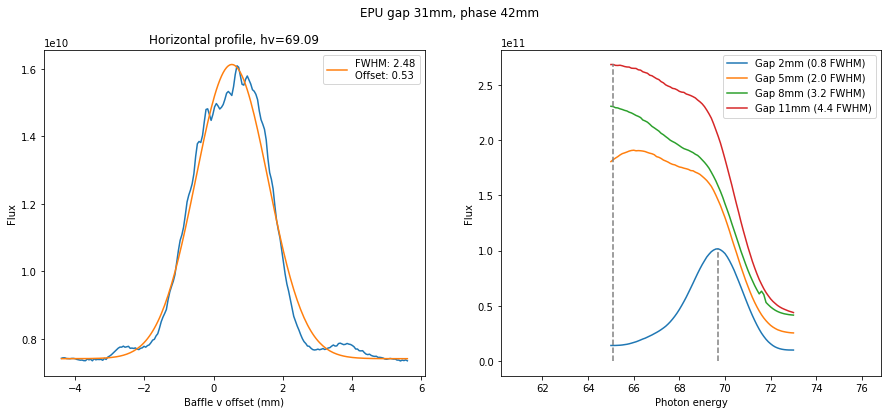



******************************** EPU gap 32 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		75.30			7.28e+10
5		71.10			1.30e+11
8		70.80			1.56e+11
11		70.80			1.78e+11


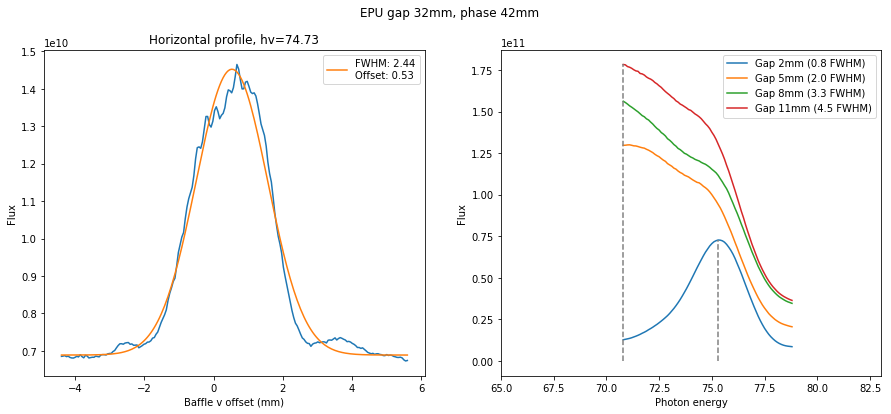



******************************** EPU gap 33 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		81.20			5.13e+10
5		76.90			8.52e+10
8		76.90			1.01e+11
11		76.90			1.18e+11


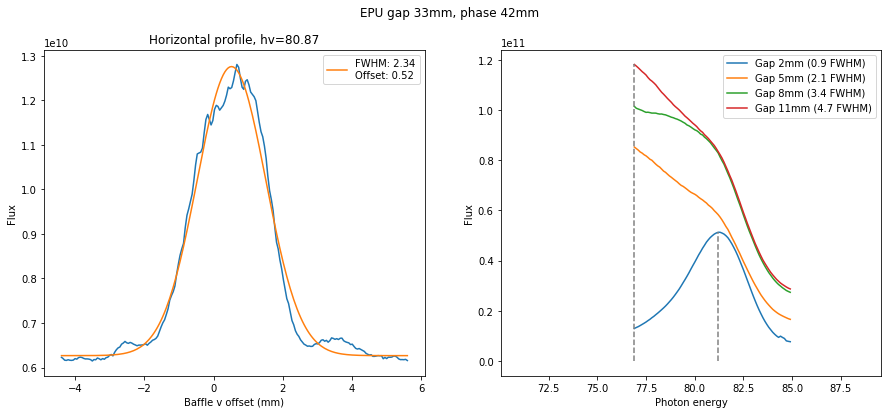



******************************** EPU gap 34 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		87.40			3.96e+10
5		83.10			6.46e+10
8		83.10			7.78e+10
11		83.10			7.64e+10


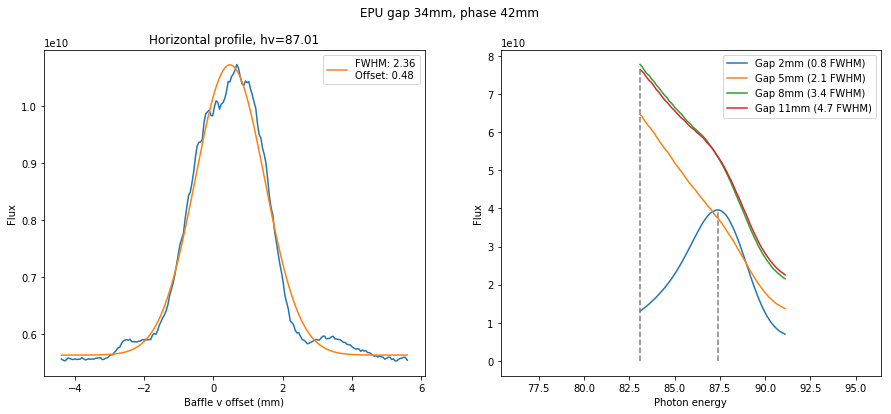



******************************** EPU gap 35 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		93.60			3.21e+10
5		89.60			4.14e+10
8		89.60			5.01e+10
11		89.60			5.01e+10


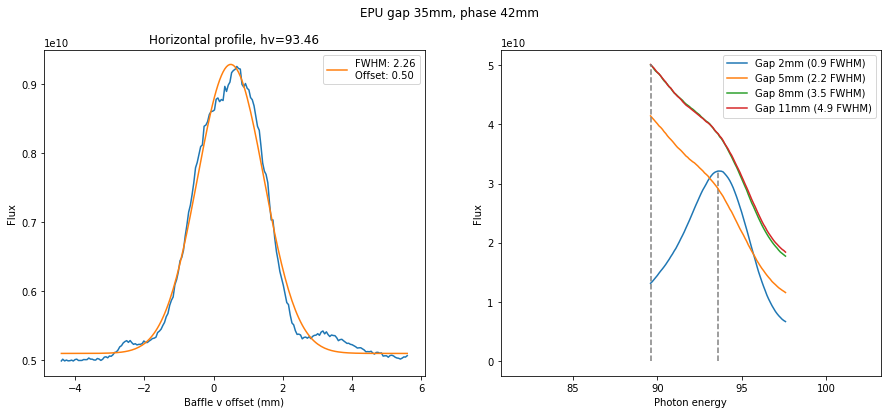



******************************** EPU gap 36 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		100.10			2.72e+10
5		96.10			2.85e+10
8		96.10			3.43e+10
11		96.20			3.22e+10


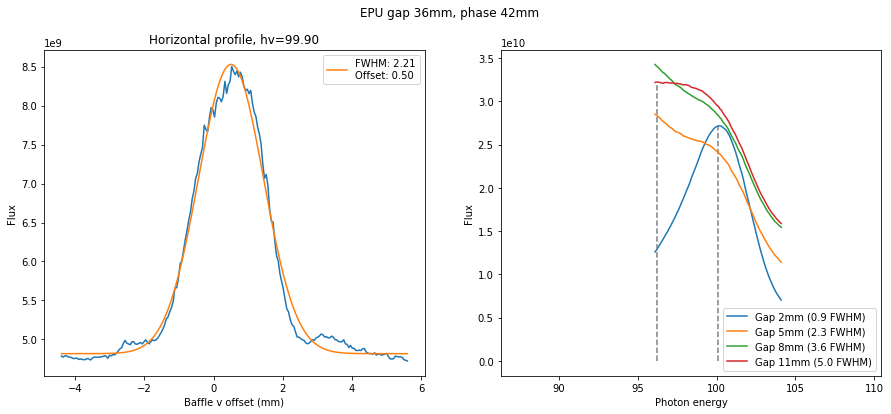



******************************** EPU gap 37 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		106.60			2.45e+10
5		102.80			2.27e+10
8		102.80			2.68e+10
11		105.00			2.67e+10


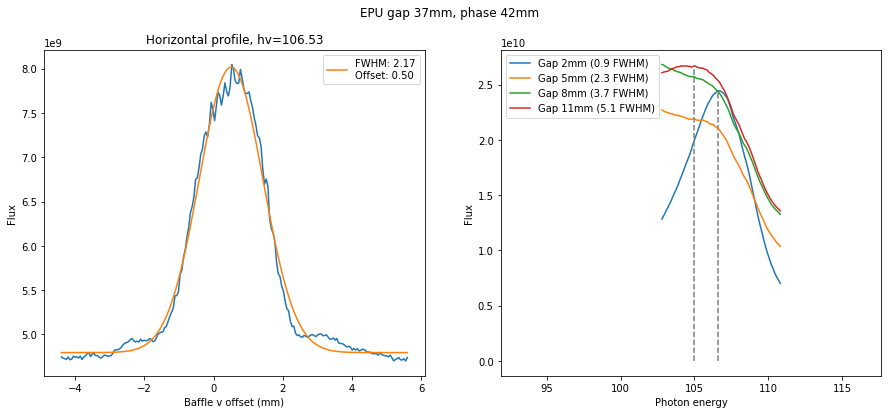



******************************** EPU gap 38 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		113.40			2.16e+10
5		112.50			1.86e+10
8		116.80			2.31e+10
11		111.80			2.22e+10


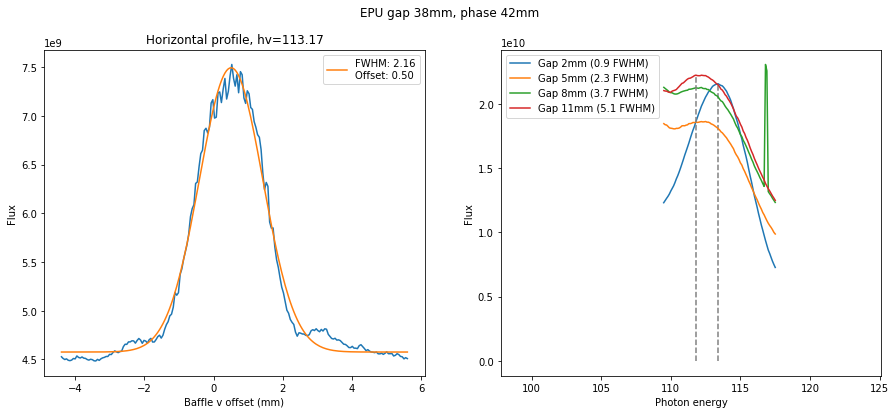



******************************** EPU gap 39 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		120.30			2.00e+10
5		118.60			1.67e+10
8		116.30			1.85e+10
11		119.30			1.75e+10


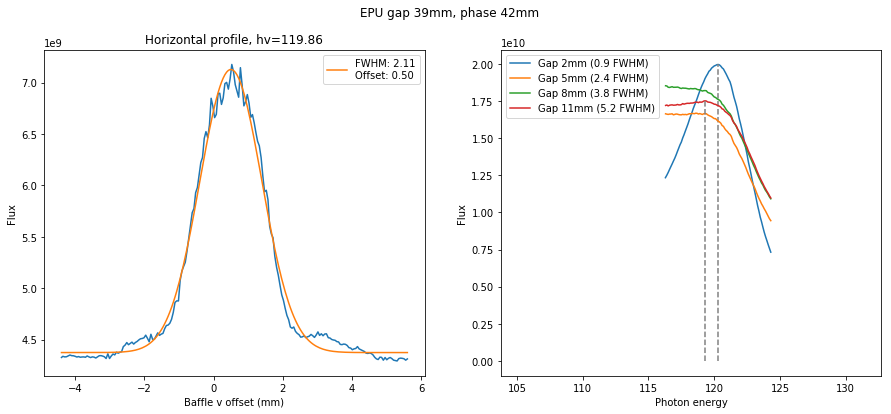



******************************** EPU gap 40 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		126.90			1.78e+10
5		125.00			2.96e+10
8		123.50			1.65e+10
11		123.60			1.56e+10


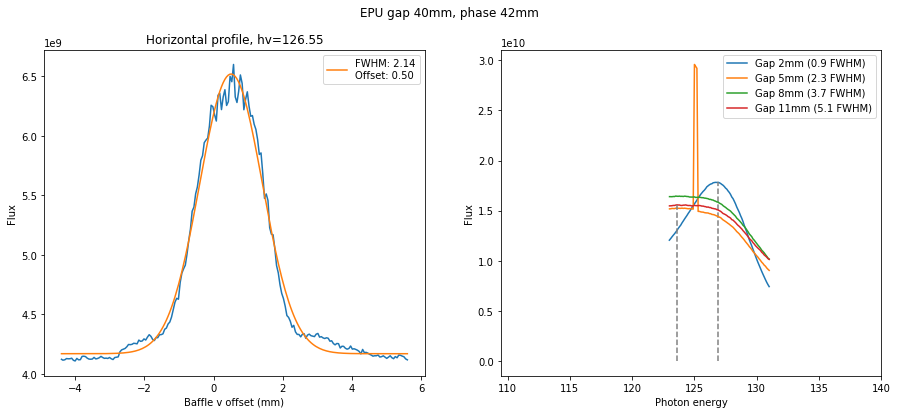



******************************** EPU gap 41 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		133.30			1.65e+10
5		130.50			1.44e+10
8		131.60			1.51e+10
11		131.60			1.44e+10


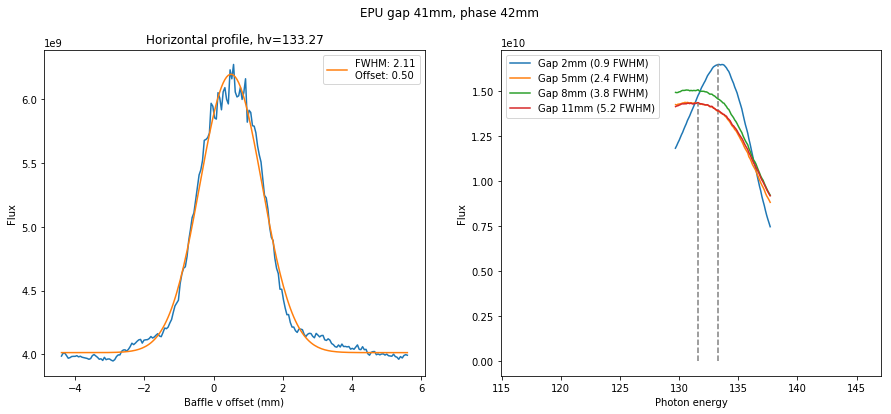



******************************** EPU gap 42 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		141.40			1.93e+10
5		138.30			1.38e+10
8		138.30			1.42e+10
11		139.50			1.42e+10


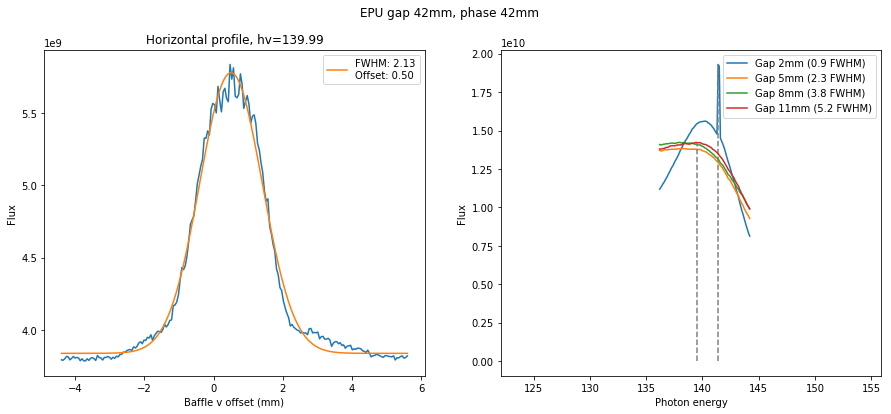



******************************** EPU gap 43 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		146.60			1.50e+10
5		145.10			1.32e+10
8		145.80			1.31e+10
11		145.60			1.32e+10


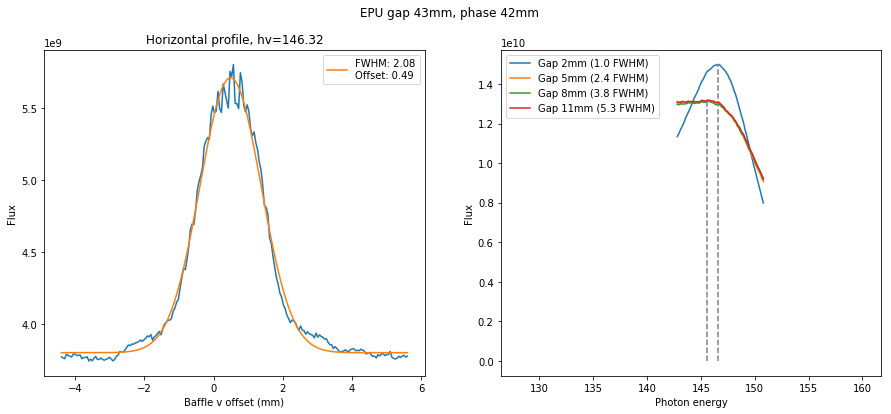



******************************** EPU gap 44 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		152.70			1.46e+10
5		151.40			1.32e+10
8		151.40			1.32e+10
11		151.40			1.32e+10


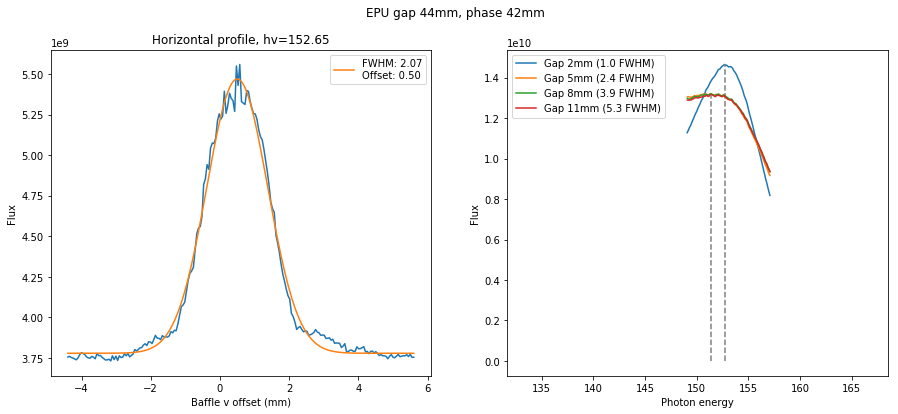



******************************** EPU gap 45 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		159.00			1.40e+10
5		157.10			1.32e+10
8		157.00			1.32e+10
11		157.90			1.31e+10


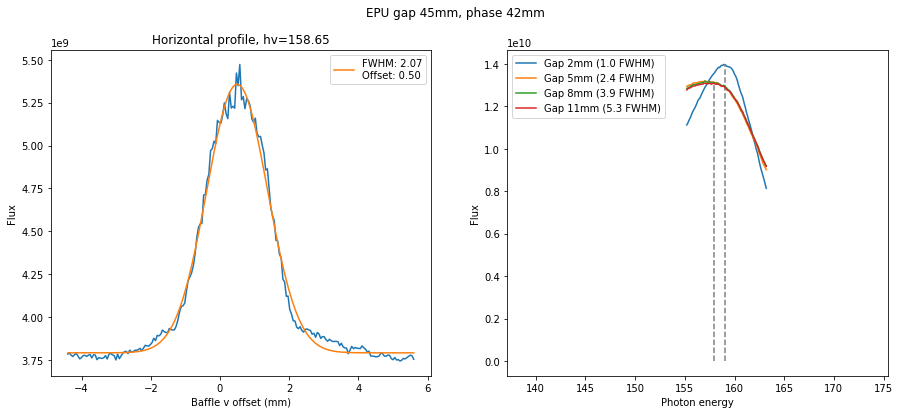



******************************** EPU gap 46 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		164.30			1.33e+10
5		163.70			1.29e+10
8		163.70			1.29e+10
11		163.70			1.28e+10


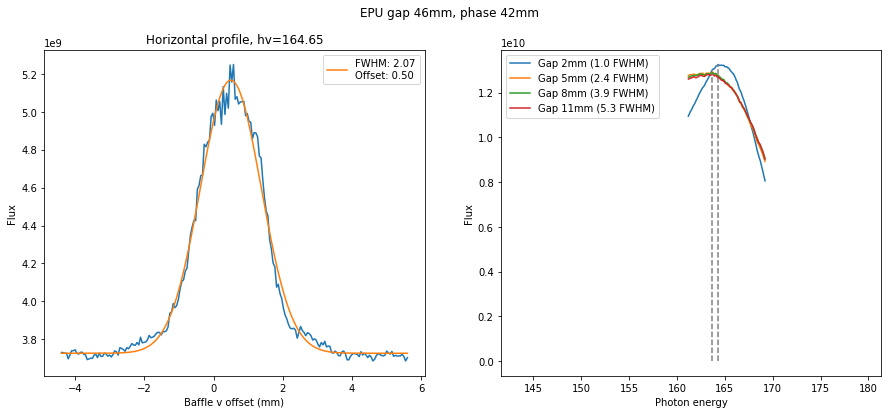



******************************** EPU gap 47 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		170.00			1.20e+10
5		167.80			1.20e+10
8		167.80			1.19e+10
11		166.80			2.27e+10


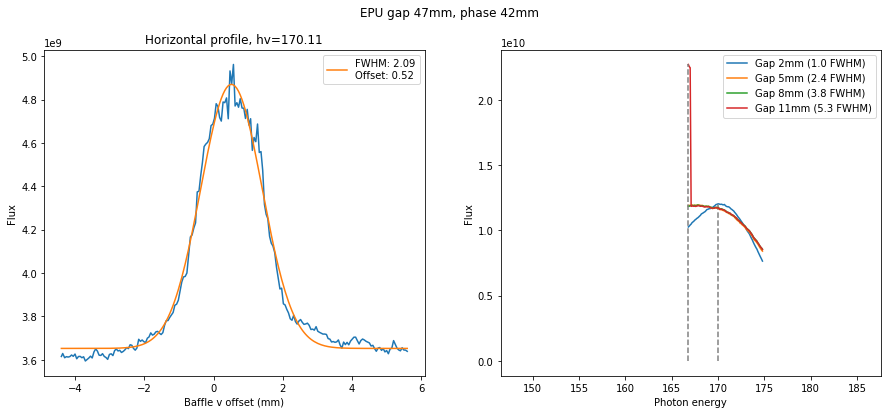



******************************** EPU gap 48 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		175.80			1.05e+10
5		172.30			1.10e+10
8		172.50			1.10e+10
11		172.30			1.10e+10


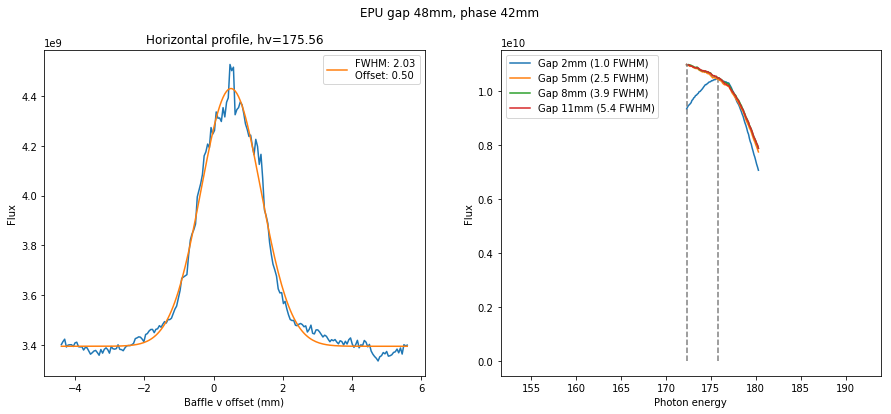



******************************** EPU gap 49 ********************************


Baffle gap (mm)	Peak position (eV)	Peak flux
----------------------------------------------
2		181.00			9.40e+09
5		177.50			9.59e+09
8		177.50			9.62e+09
11		181.60			1.76e+10


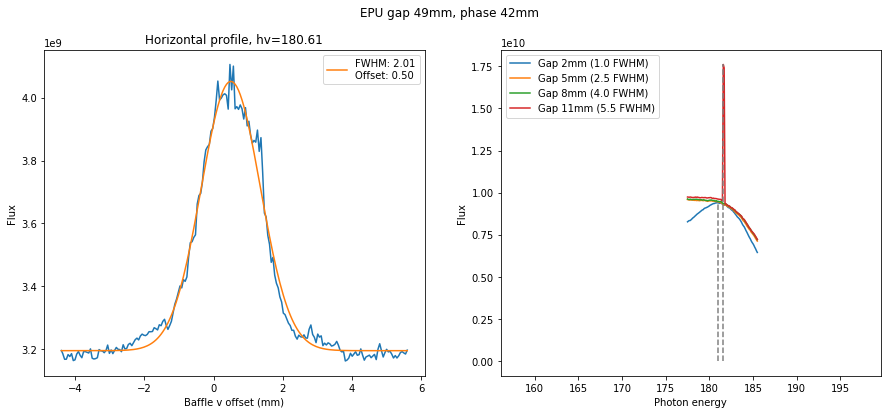

In [62]:
%matplotlib inline
dataFile=loadHDF5(data_folder/"craigJunk.h5")

entryNumber = 2857
gaps = [n for n in range(22,50)]
lookupTable = 'vpol_gaps.txt'

for gap in gaps:
    print("\n\n******************************** EPU gap {0} ********************************\n\n".format(gap))
    fig=plt.figure(figsize=[15,6])
    fig.suptitle("EPU gap {0}mm, phase 42mm".format(gap))
    plt.subplot(1,2,1)
    plt.xlabel('Baffle v offset (mm)')
    plt.ylabel('Flux')
    hv=lookupHarmonicEnergy(lookupTable,gap,1)
    plt.title("Horizontal profile, hv={0:.2f}".format(hv))
    scan=loadAllDatasetsFromScan(dataFile,entryNumber)
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['mono_energy']=[hv for n in scan['diodeCurrent']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    
    params = Parameters()
    params.add('amplitude', 	value=3e9, vary=True)
    params.add('width', 	value=1,vary=True)
    params.add('center', 	value=0.65,vary=True)
    params.add('offset', 	value=2e10, min=0,vary=True)

    out = minimize(residual, params,args=(scan['mono_baff_v_offset'], scan['flux']),method='leastsq')

    fittedCurve=Gauss(out.params,scan['mono_baff_v_offset'])
    FWHM = 2*math.sqrt(2*math.log(2))*out.params['width'].value
    offset = out.params['center'].value
    plt.plot(scan['mono_baff_v_offset'],scan['flux'])
    plt.plot(scan['mono_baff_v_offset'],fittedCurve,label='FWHM: {0:.2f}\nOffset: {1:.2f}'.format(FWHM,offset))
    plt.legend()
    
   
    plt.subplot(1,2,2)
    print("Baffle gap (mm)\tPeak position (eV)\tPeak flux")
    print("----------------------------------------------")
    plt.ylabel('Flux')
    plt.xlabel('Photon energy')
    
    entryNumber+=1
    baffleGap = 2
    scan=loadAllDatasetsFromScan(dataFile,entryNumber)
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm ({1:.1f} FWHM)".format(baffleGap,baffleGap/FWHM))
    
    experiment_hv = scan['mono_energy'][scan['flux'].index(max(scan['flux']))]
    experiment_flux = max(scan['flux'])   
    plt.plot([experiment_hv,experiment_hv],[0,experiment_flux],linestyle='--',color='grey')
    print("{0}\t\t{1:.2f}\t\t\t{2:.2e}".format(baffleGap,experiment_hv,experiment_flux))
 
    plt.xlim([experiment_hv-(4*hv/29),experiment_hv+(3*hv/29)])

    entryNumber+=1
    baffleGap = 5
    scan=loadAllDatasetsFromScan(dataFile,entryNumber)
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm ({1:.1f} FWHM)".format(baffleGap,baffleGap/FWHM))
    
    experiment_hv = scan['mono_energy'][scan['flux'].index(max(scan['flux']))]
    experiment_flux = max(scan['flux'])   
    print("{0}\t\t{1:.2f}\t\t\t{2:.2e}".format(baffleGap,experiment_hv,experiment_flux))
    
    entryNumber+=1
    baffleGap = 8
    scan=loadAllDatasetsFromScan(dataFile,entryNumber)
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm ({1:.1f} FWHM)".format(baffleGap,baffleGap/FWHM))
    
    experiment_hv = scan['mono_energy'][scan['flux'].index(max(scan['flux']))]
    experiment_flux = max(scan['flux'])   
    print("{0}\t\t{1:.2f}\t\t\t{2:.2e}".format(baffleGap,experiment_hv,experiment_flux))
    
    entryNumber+=1
    baffleGap = 11
    scan=loadAllDatasetsFromScan(dataFile,entryNumber)
    scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
    scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
    plt.plot(scan['mono_energy'],scan['flux'],label="Gap {0}mm ({1:.1f} FWHM)".format(baffleGap,baffleGap/FWHM))
    
    experiment_hv = scan['mono_energy'][scan['flux'].index(max(scan['flux']))]
    experiment_flux = max(scan['flux'])   
    plt.plot([experiment_hv,experiment_hv],[0,experiment_flux],linestyle='--',color='grey')
    print("{0}\t\t{1:.2f}\t\t\t{2:.2e}".format(baffleGap,experiment_hv,experiment_flux))
    
    plt.legend()
    

    plt.show()
    
    entryNumber+=1

dataFile.close()



<IPython.core.display.Javascript object>


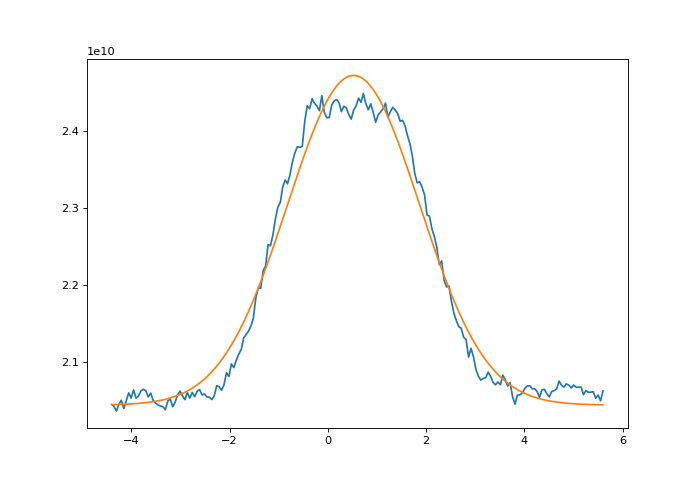

amplitude		4.2708e+09
width		1.3468
center		0.52281
offset		2.0446e+10


In [45]:


fig=plt.figure(figsize=(6,6))

dataFile=loadHDF5(data_folder/"craigJunk.h5")
scan=loadAllDatasetsFromScan(dataFile,entryNumber)
scan['diodeCurrent'] = [((ii*-1)/1000) for ii in scan['b110a_ctl_em02_ch03']]
scan['mono_energy']=[hv for n in scan['diodeCurrent']]
scan['flux'] = [currentToFlux(I,hv) for I,hv in zip(scan['diodeCurrent'],scan['mono_energy'])]
plt.plot(scan['mono_baff_v_offset'],scan['flux'])
dataFile.close()



# -----------------
# --- Curve fit ---
# -----------------

params = Parameters()
params.add('amplitude', 	value=3e9, vary=True)
params.add('width', 	value=1,vary=True)
params.add('center', 	value=0.65,vary=True)
params.add('offset', 	value=2e10, min=0,vary=True)

out = minimize(residual, params,args=(scan['mono_baff_v_offset'], scan['flux']),method='leastsq')

for key, par in out.params.items():
    print("{0}\t\t{1:.5g}".format(key, par.value))

fittedCurve=Gauss(out.params,scan['mono_baff_v_offset'])

plt.plot(scan['mono_baff_v_offset'],fittedCurve)
plt.show()

In [43]:
2*math.sqrt(2*math.log(2))*1.3468

3.1714716366476825

You can simulate the radial beam profile in SPECTRA. From memory, I did this by just computing a regular spatial flux profile on a half mesh (so that the zeroth index is a cut though the middle of the beam)

In [ ]:
calculation_folder = Path('SPECTRA_calculations/')
im01,im01_extent=loadSPECTRA_image(calculation_folder/"radial.dta")

angle=np.arange(0-0.6, 0.6, 4.013e-03)
intensity = im01[:,0]

fig=plt.figure()
plt.plot(angle,intensity)
plt.show()